<a href="https://colab.research.google.com/github/Takashi-Tokyo/studyai/blob/master/Deep_learning_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ラビットチャレンジ/深層学習day4/Section1:強化学習
## 100文字以上の要点まとめ

・強化学習  
行動の結果として与えられる利益（報酬）をもとに行動を決定する原理/規則を獲得/改善していく仕組み。機械学習手法の1種。環境という与えられた枠組みの中で行動を選択するエージェントと環境の相互作用。長期的にエージェントが得られる報酬を最大化するような行動をとるように学習が行われる。
強化学習は、良い方策（戦略）を見つけることが目標となる。対して、教師あり学習、教師なし学習は、データから特徴量を見つけ出し、未知のデータを予想する。  

・探索と利用のトレードオフ  
不完全な知識をもとに行動しながらデータを収集しながら、最適な行動を見つけていく。強化学習で具体的に学習するものは、方策関数、行動価値関数である。

・方策関数 $\pi(a|s,\theta)$  
方策ベースの強化学習手法において、ある状態でどのような行動を採るのかの確率を与える関数。
その最適な値は$\theta'(t+1)=\theta^{(t)}+\epsilon\nabla J(\theta)$として求められる（方策勾配法）。この$J(\theta)$は、期待収益で、下式に求まる。
$$\nabla_{\theta}J(\theta)=E_{\pi_{\theta}}[(\nabla_{\theta}log\pi_{\theta}(a|s)Q^{\pi}(s,a))]$$


・状態価値関数  
ある状態の価値に注目する。

・行動価値関数  
状態と価値を組み合わせた価値に注目する。
計算速度の進展により大規模な状態を持つ場合での学習が可能となりつつある。

・関数近似法  
価値関数や方策関数を関数近似する手法。

・Ｑ学習  
行動価値関数を、行動する度に更新していきながら学習を進める手法。

・方策反復法  
方策をモデル化して最適化する手法で、これに勾配を用いたものを方策勾配法という。

# ラビットチャレンジ/深層学習day4/Section2:AlphaGo
## 100文字以上の要点まとめ

・Alpha Go Lee  
PolicyNet、ValueNetは共に畳み込みニューラルネットワークで構成されている。
2つのネットワークの入力には、石の数、着手履歴、呼吸点などの特徴に対応する48チャネルを持つ。
PolicyNetは、19x19マスの着手予想確率が出力される(softmax関数)。ValueNetは、現在の局面の勝率を-1～1で表したものが出力される(tanh関数)。  
Alpha Goは学習プロセスは、  
１.教師あり学習によるRollOutPolicyとPolicyNetの学習。  
２.強化学習によるPolicyNetの学習。  
３.強化学習によるValueNetの学習。という流れである。  

・モンテカルロ木探索  
強化学習（価値関数）の学習方法。  

・Alpha Go Zero  
Leeとの違いとして、教師あり学習を使わず、強化学習のみで実現。入力特徴からヒューリスティックな要素を排除して、石の配置のみを利用。PolicyNetとValueNetの統合。Residual Netの導入。Rolloutシミュレーションを使わない。(モンテカルロ木から削除)  

・Residual Net  
ネットワークにショートカット構造を追加した仕組みである。ショートカット構造のスキップにより、勾配の爆発、消失を抑える効果がある。  
基本構造はConvolution→BatchNorm→ReLU→Convolution→BatchNorm→Add→ReLUのBlockを１単位にして積み重ねる形をとる。  

・Residual Blockの工夫   
Bottleneck: 1x1畳み込みを利用し、計算量を増やさずに層を深くする方法  
Preactivation: 畳み込み層の前に活性化関数を配置  

・Network構造の工夫  
WideResNet: 畳み込みのフィルタ数を定数倍にしたもの  
PyramidNet: 段階的にではなく、各層でフィルタ数を増やす工夫



# ラビットチャレンジ/深層学習day4/Section3:軽量化・高速化技術
## 100文字以上の要点まとめ
・軽量化・高速化技術  
深層学習では、多くのデータを使用し、パラメータ調整のために多くの時間を使用するため、高速な計算が求められる。複数の計算資源(ワーカー)を使用し、並列的にニューラルネットを構成することで、効率の良い学習を行うことができる(分散深層学習)。分散深層学習にはデータ並列化・モデル並列化がある。またGPUを使用することで高速な計算が可能になる。  

・データ並列化  
親モデルを各ワーカーに子モデルとしてコピーした後、データを分割し、各ワーカーごとに計算させる。各モデルのパラメータの合わせ方で、同期型か非同期型か決まる。同期型では、各ワーカーの計算が終わるのを待ち、全ワーカーの勾配が出たところで勾配の平均を計算し、親モデルのパラメータを更新する。非同期型では、各ワーカーはお互いの計算終了を待たず、各子モデルごとに更新を行う。学習が終わった子モデルはパラメータサーバにPushされる。新たに学習を始める時は、パラメータサーバからPopしたモデルに対して学習していく。処理のスピードは、お互いのワーカーの計算を待たない非同期型の方が早いが、非同期型は最新のモデルのパラメータを利用できないので、学習が不安定になりやすい(Stale Gradient Problem)。現在は同期型の方が精度が良いことが多いので、主流となっている。


・モデル並列化    
親モデルを各ワーカーに分割し、それぞれのモデルを学習させ、全てのデータで学習が終わった後で、一つのモデルに復元する。一般に、モデルが大きい時はモデル並列化を、データが大きい時はデータ並列化をする。  

・GPUによる高速化  
深層学習で用いられるGPUは、GPGPU(General-purpose on GPU)と呼ばれ、元々の使用目的であるグラフィック以外の用途で使用されるGPUの総称のことである。CPUが高性能なコアが少数、複雑で連続的な処理が得意という特徴があるのに対し、GPUは比較的低性能なコアが多数あり、簡単な並列処理を得意とするため単純な行列演算が多いニューラルネットワークの学習で高速化が可能となる。

・モデルの軽量化  
モデルの精度を維持しつつパラメータや演算回数を低減する手法の総称をモデルの軽量化という。 モデルの軽量化は、特にパソコンに比べ、計算速度と搭載されているメモリにおいて性能が大きく劣るモバイル端末やIoT機器において有用な手法である。軽量化の代表的な手法として下記の3つ(量子化・蒸留・プルーニング)がある。  

・量子化(Quantization)  
通常のパラメータの64bit浮動小数点を32bitなど下位の精度に落とすことでメモリと演算処理の削減を行う方法である。精度の低下とトレードオフの関係であるため、量子化を行う場合は精度の点に留意する。  

・蒸留(Distillation)  
学習済みの精度の高いモデルの知識を軽量なモデルへ継承させることで、軽量でありながら複雑なモデルに匹敵する精度のモデルを得る手法のことである。蒸留は、予測精度の高い、複雑なモデルやアンサンブルされた教師モデルと、教師モデルをもとに作られる軽量な生徒モデルの2つで構成される。学習では、誤差は教師モデルと生徒モデルのそれぞれの誤差を使って教師モデルの重みを固定したまま、生徒モデルの重みのみを更新していく。  

・プルーニング（Pruning）  
モデルの精度に寄与しない（寄与が少ない）ニューロンを削減することでモデルの軽量化、高速化を図るものである。  

# ラビットチャレンジ/深層学習day4/Section4:応用技術
## 100文字以上の要点まとめ

・MobileNet  
軽量化した画像認識モデル。Depthwise ConvolutionとPointwise Convolutionの組み合わせで軽量化を実現している。  

・Depthwise Convolution  
入力マップのチャネルごとに畳み込み演算をする。  

・Pointwise Convolution  
1x1の畳み込み層と同等。

・DenseNet  
DenseBlockを組み込んだ画像認識ネットワーク。  

・DenseBlock  
出力層の前に層の入力を足し合わせる。  
DenseBlockでは前方の各層からの出力全てが後方の層への入力として用いられる。。

・RessidualBlock  
前1層の入力のみが後方の層へ入力される。  

・Batch Norm Layer  
ミニバッチ単位で正規化を行う。Batch Sizeが小さい条件下では、学習が収束しないことがあり、代わりにLayer Normalizationなどの正規化手法が使われることが多い。ミニバッチのサイズに大きく影響を受ける。  

・Batch Norm  
ミニバッチに含まれるsampleの同一チャネルが同一分布に従うよう正規化を行う。  

・Layer Norm  
それぞれのsampleの全てのピクセルが同一分布に従うよう正規化を行う。 

・Instance Norm  
チャネルも同一分布に従うよう正規化を行う。  

・Wavenet  
音声波形を生成するネットワーク。時系列データに対し畳み込み（Dilated Convolution）を適用する。  

・Dilated Convolution  
層が深くなるにつれて畳み込むリンクを離す。これにより、パラメータに対する受容野が大きくなる。  

# ResNet

Residual Networkの略。2015年に考案されたニューラルネットワークのモデル。


・SkipConection  
中間層において、weightlayerをスキップすることで深い層の積み重ねでも学習可能になる。勾配消失や勾配爆発の回避が可能となる。具体的には恒等関数で層をスキップする。  
中間層部分出力：$H(x)$  
残差ブロック：$H(x)=F(x)+x$  
学習ブロック：$F(x)$  


・Bottleneck構造  
BottleneckアーキテクチャはPlainアーキテクチャと比較して同一計算コストで１層多い構造を持ち、途中の層で層で3$\times$3の畳込みを行う。


・WideResnet  
Resnetにおけるフィルタ数をK倍することで  
1.畳込みチャンネル数が増加  
2.高速・高精度の学習が可能に  
3.GPUの特性に合った動作動作  
また、Resnetに比べ層数を浅くし、DropoutをResidualブロックに導入

事事前学習(pre-training)-ファインチューニング(fine-tuning)で用いられるモデル。


##実装演習/転移学習

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
tf_flowers = tfds.image_classification.TFFlowers()
tf_flowers.download_and_prepare()

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
(train_ds, test_ds) = tf_flowers.as_dataset(as_supervised=True, split=['train[:70%]', 'train[70%:]'], shuffle_files=True)

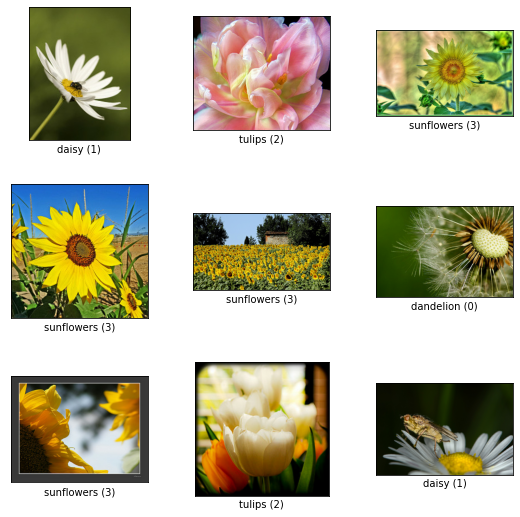

In [ ]:
fig = tfds.show_examples(train_ds, tf_flowers.info)

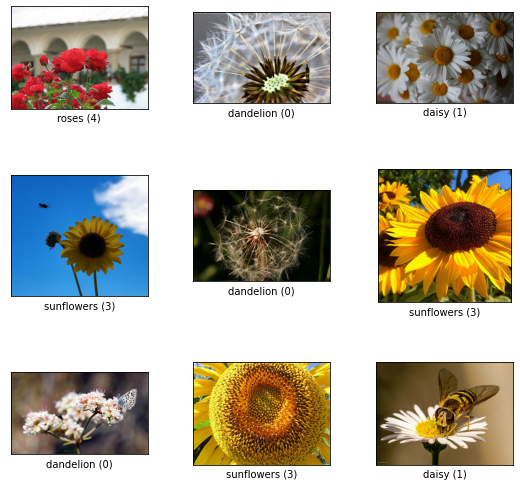

In [ ]:
fig = tfds.show_examples(test_ds, tf_flowers.info)

In [ ]:
class_num = tf_flowers.info.features['label'].num_classes
class_num

5

In [ ]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES)) / 255.0
    label = tf.one_hot(label, depth=class_num)

    return image, label

BATCH_SIZE = 16

train_batches = train_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)

print(train_batches)
print(test_batches)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [ ]:
#事前学習なしでResNetを利用する

resnet = tf.keras.applications.resnet.ResNet50(weights=None)
resnet.trainable = True
x1 = resnet.layers[-2].output # avg_poolまでのoutputを取得します。
out = tf.keras.layers.Dense(class_num, activation='softmax')(x1) # avg_poolから出力層に繋げます。
model = tf.keras.models.Model(inputs=resnet.input, outputs=out)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
histories = []

In [ ]:
EPOCHS = 20

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=test_batches,
                    callbacks=[
                               tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
                    ])
histories.append(history)

Epoch 1/20
161/161 [==============================] - 51s 202ms/step - loss: 1.4034 - acc: 0.4301 - val_loss: 5.2077 - val_acc: 0.2352
Epoch 2/20
161/161 [==============================] - 30s 188ms/step - loss: 1.2330 - acc: 0.5064 - val_loss: 9.4403 - val_acc: 0.2352
Epoch 3/20
161/161 [==============================] - 33s 202ms/step - loss: 1.1648 - acc: 0.5368 - val_loss: 2.8628 - val_acc: 0.2825
Epoch 4/20
161/161 [==============================] - 33s 204ms/step - loss: 1.0726 - acc: 0.5691 - val_loss: 1.3716 - val_acc: 0.4886
Epoch 5/20
161/161 [==============================] - 31s 192ms/step - loss: 1.0071 - acc: 0.6080 - val_loss: 1.7947 - val_acc: 0.4696
Epoch 6/20
161/161 [==============================] - 31s 193ms/step - loss: 0.9158 - acc: 0.6590 - val_loss: 1.7732 - val_acc: 0.4550


In [ ]:
#ImageNetによる事前学習を利用する(Weightを再利用、事前学習部分は固定)
resnet = tf.keras.applications.resnet.ResNet50(weights='imagenet')
resnet.trainable = False
x1 = resnet.layers[-2].output # avg_poolまでのoutputを取得します。
out = tf.keras.layers.Dense(class_num, activation='softmax')(x1) # avg_poolから出力層に繋げます。
model = tf.keras.models.Model(inputs=resnet.input, outputs=out)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

102981632/102967424 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                         

In [ ]:
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=test_batches,
                    callbacks=[
                               tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
                    ])
histories.append(history)

Epoch 1/20
161/161 [==============================] - 15s 76ms/step - loss: 1.6350 - acc: 0.2195 - val_loss: 1.5932 - val_acc: 0.2679
Epoch 2/20
161/161 [==============================] - 11s 71ms/step - loss: 1.5719 - acc: 0.3036 - val_loss: 1.5683 - val_acc: 0.2934
Epoch 3/20
161/161 [==============================] - 11s 71ms/step - loss: 1.5495 - acc: 0.3359 - val_loss: 1.5491 - val_acc: 0.3124
Epoch 4/20
161/161 [==============================] - 12s 72ms/step - loss: 1.5322 - acc: 0.3429 - val_loss: 1.5340 - val_acc: 0.3243
Epoch 5/20
161/161 [==============================] - 11s 71ms/step - loss: 1.5185 - acc: 0.3554 - val_loss: 1.5220 - val_acc: 0.3333
Epoch 6/20
161/161 [==============================] - 12s 72ms/step - loss: 1.5074 - acc: 0.3620 - val_loss: 1.5121 - val_acc: 0.3424
Epoch 7/20
161/161 [==============================] - 12s 72ms/step - loss: 1.4982 - acc: 0.3686 - val_loss: 1.5038 - val_acc: 0.3460
Epoch 8/20
161/161 [==============================] - 14s 84ms

In [ ]:
#ImageNetによる事前学習を利用する(ファインチューニングあり)
resnet = tf.keras.applications.resnet.ResNet50(weights='imagenet')
resnet.trainable = True
x1 = resnet.layers[-2].output
out = tf.keras.layers.Dense(class_num, activation='softmax')(x1)
model = tf.keras.models.Model(inputs=resnet.input, outputs=out)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=test_batches,
                    callbacks=[
                               tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
                    ])
histories.append(history)

Epoch 1/20
161/161 [==============================] - 38s 200ms/step - loss: 0.4590 - acc: 0.8412 - val_loss: 1.8299 - val_acc: 0.2380
Epoch 2/20
161/161 [==============================] - 32s 196ms/step - loss: 0.0512 - acc: 0.9860 - val_loss: 2.1819 - val_acc: 0.2080
Epoch 3/20
161/161 [==============================] - 32s 196ms/step - loss: 0.0079 - acc: 0.9984 - val_loss: 1.9933 - val_acc: 0.3306
Epoch 4/20
161/161 [==============================] - 32s 197ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.0628 - val_acc: 0.6467
Epoch 5/20
161/161 [==============================] - 32s 196ms/step - loss: 6.6144e-04 - acc: 1.0000 - val_loss: 0.4255 - val_acc: 0.8629
Epoch 6/20
161/161 [==============================] - 32s 196ms/step - loss: 4.5177e-04 - acc: 1.0000 - val_loss: 0.2385 - val_acc: 0.9237
Epoch 7/20
161/161 [==============================] - 31s 196ms/step - loss: 3.3905e-04 - acc: 1.0000 - val_loss: 0.1818 - val_acc: 0.9482
Epoch 8/20
161/161 [=======================

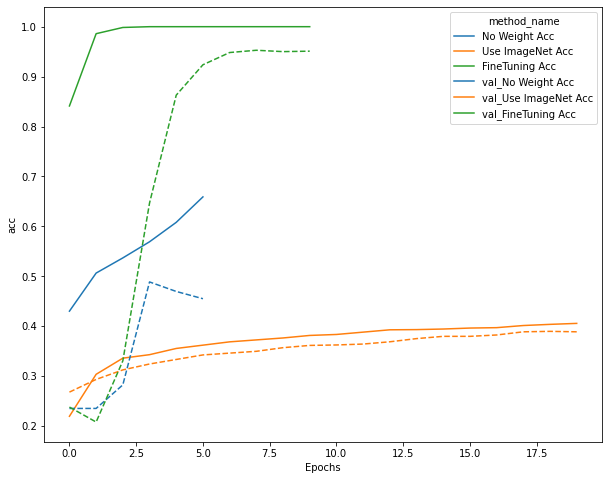

In [ ]:
#それぞれの学習曲線を確認する
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
method_names = [
                'No Weight Acc',
                'Use ImageNet Acc',
                'FineTuning Acc'
]

plot_df = pd.DataFrame()

for i, history in enumerate(histories):
    method_name = str(method_names[i])
    history_df = pd.DataFrame(history.history)
    history_df['method_name'] = method_name
    history_df['Epochs'] = history_df.index
    plot_df = pd.concat([plot_df, history_df], ignore_index= True)
    
sns.lineplot(data=plot_df, x=plot_df['Epochs'], y='acc', hue='method_name')
val_plot_df = plot_df
val_plot_df['method_name'] = plot_df['method_name'].apply(lambda x: 'val_' + x)
sns.lineplot(data=val_plot_df, x=plot_df['Epochs'], y='val_acc', hue='method_name', linestyle='dashed')

## 実装演習/Wide Resnet

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [ ]:
tf_flowers = tfds.image_classification.TFFlowers()
tf_flowers.download_and_prepare()

In [ ]:
(train_ds, test_ds) = tf_flowers.as_dataset(as_supervised=True, split=['train[:70%]', 'train[70%:]'], shuffle_files=True)

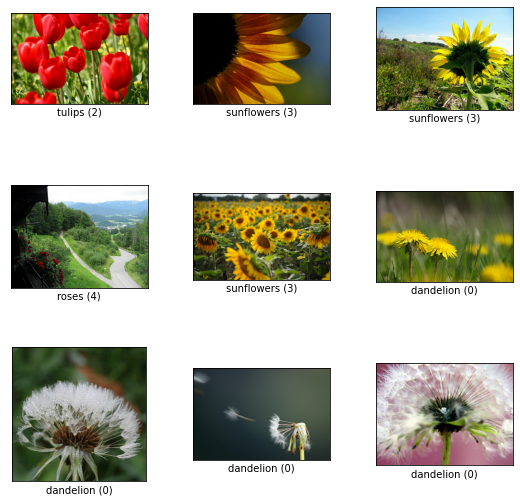

In [ ]:
fig = tfds.show_examples(train_ds, tf_flowers.info)

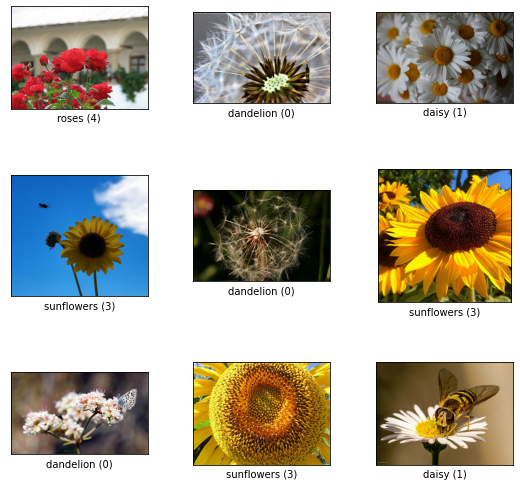

In [ ]:
fig = tfds.show_examples(test_ds, tf_flowers.info)

In [ ]:
class_num = tf_flowers.info.features['label'].num_classes
class_num

5

In [ ]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES)) / 255.0
    label = tf.one_hot(label, depth=class_num)

    return image, label

BATCH_SIZE = 16

train_batches = train_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)

print(train_batches)
print(test_batches)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [ ]:
histories = []

In [ ]:
EPOCHS = 20

In [ ]:
# ResNetの例　転移学習(Weightを再利用、事前学習部分はWeight固定)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5", trainable=False),
    tf.keras.layers.Dense(class_num, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23561152  
                                                                 
 dense_3 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,571,397
Trainable params: 10,245
Non-trainable params: 23,561,152
_________________________________________________________________


In [ ]:
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test_batches,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
    ]
)
histories.append(history)

Epoch 1/20
161/161 [==============================] - 16s 67ms/step - loss: 0.5920 - acc: 0.7785 - val_loss: 0.3366 - val_acc: 0.8801
Epoch 2/20
161/161 [==============================] - 10s 63ms/step - loss: 0.2569 - acc: 0.9198 - val_loss: 0.2836 - val_acc: 0.9001
Epoch 3/20
161/161 [==============================] - 10s 61ms/step - loss: 0.1743 - acc: 0.9576 - val_loss: 0.2645 - val_acc: 0.9110
Epoch 4/20
161/161 [==============================] - 10s 60ms/step - loss: 0.1300 - acc: 0.9716 - val_loss: 0.2576 - val_acc: 0.9183
Epoch 5/20
161/161 [==============================] - 10s 63ms/step - loss: 0.1023 - acc: 0.9805 - val_loss: 0.2549 - val_acc: 0.9128
Epoch 6/20
161/161 [==============================] - 9s 55ms/step - loss: 0.0832 - acc: 0.9868 - val_loss: 0.2530 - val_acc: 0.9119


In [ ]:
#ファインチューニング(事前学習部分ののWeightも再調整)
#ResNetには、BatchNorm層が存在する。
#ファインチューニングで、ResNetの部分の重みを再調整する場合でも、BatchNorm層に存在する平均や分散の値は更新しない。
#そのため、`Non-trainable params`が存在する。

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5", trainable=True),
    tf.keras.layers.Dense(class_num, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              23561152  
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,571,397
Trainable params: 23,518,277
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test_batches,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
    ]
)
histories.append(history)

Epoch 1/20
161/161 [==============================] - 36s 180ms/step - loss: 1.3343 - acc: 0.6419 - val_loss: 4.4153 - val_acc: 0.2452
Epoch 2/20
161/161 [==============================] - 28s 177ms/step - loss: 0.9627 - acc: 0.7548 - val_loss: 1.5531 - val_acc: 0.6104
Epoch 3/20
161/161 [==============================] - 28s 176ms/step - loss: 0.8040 - acc: 0.8209 - val_loss: 1.0871 - val_acc: 0.7384
Epoch 4/20
161/161 [==============================] - 29s 179ms/step - loss: 0.6842 - acc: 0.8688 - val_loss: 2.6229 - val_acc: 0.5622
Epoch 5/20
161/161 [==============================] - 29s 181ms/step - loss: 0.6123 - acc: 0.8980 - val_loss: 1.5988 - val_acc: 0.6394


In [ ]:
#WideResnetの例例
#次の２つの例では、WideResNetの構造を用いた用いた
#転移学習(Weightを再利用、事前学習部分ののWeightは固定)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub.KerasLayer("https://tfhub.dev/google/bit/s-r50x3/1", trainable=False),
    tf.keras.layers.Dense(class_num, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 6144)              211174080 
                                                                 
 dense_5 (Dense)             (None, 5)                 30725     
                                                                 
Total params: 211,204,805
Trainable params: 30,725
Non-trainable params: 211,174,080
_________________________________________________________________


In [ ]:
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test_batches,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
    ]
)
histories.append(history)

Epoch 1/20
161/161 [==============================] - 128s 716ms/step - loss: 0.7821 - acc: 0.7404 - val_loss: 0.4812 - val_acc: 0.8547
Epoch 2/20
161/161 [==============================] - 115s 715ms/step - loss: 0.3981 - acc: 0.8840 - val_loss: 0.3555 - val_acc: 0.8928
Epoch 3/20
161/161 [==============================] - 116s 724ms/step - loss: 0.3063 - acc: 0.9070 - val_loss: 0.3042 - val_acc: 0.9092
Epoch 4/20
161/161 [==============================] - 115s 716ms/step - loss: 0.2583 - acc: 0.9221 - val_loss: 0.2753 - val_acc: 0.9173
Epoch 5/20
161/161 [==============================] - 116s 724ms/step - loss: 0.2263 - acc: 0.9338 - val_loss: 0.2565 - val_acc: 0.9210
Epoch 6/20
161/161 [==============================] - 117s 725ms/step - loss: 0.2023 - acc: 0.9393 - val_loss: 0.2430 - val_acc: 0.9219
Epoch 7/20
161/161 [==============================] - 116s 724ms/step - loss: 0.1832 - acc: 0.9478 - val_loss: 0.2330 - val_acc: 0.9237
Epoch 8/20
161/161 [============================

In [ ]:
#ファインチューニング(事前学習部分ののWeightも再調整)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub.KerasLayer("https://tfhub.dev/google/bit/s-r50x3/1", trainable=True),
    tf.keras.layers.Dense(class_num, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['acc']) # learning_rateを調整しています。
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 6144)              211174080 
                                                                 
 dense_6 (Dense)             (None, 5)                 30725     
                                                                 
Total params: 211,204,805
Trainable params: 211,204,805
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test_batches,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, mode='max')
    ]
)
histories.append(history)

Epoch 1/20
161/161 [==============================] - 314s 2s/step - loss: 0.3258 - acc: 0.8813 - val_loss: 0.1317 - val_acc: 0.9573
Epoch 2/20
161/161 [==============================] - 291s 2s/step - loss: 0.0250 - acc: 0.9938 - val_loss: 0.1016 - val_acc: 0.9628
Epoch 3/20
161/161 [==============================] - 291s 2s/step - loss: 0.0041 - acc: 0.9992 - val_loss: 0.0974 - val_acc: 0.9664
Epoch 4/20
161/161 [==============================] - 291s 2s/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0991 - val_acc: 0.9664
Epoch 5/20
161/161 [==============================] - 291s 2s/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.1002 - val_acc: 0.9673
Epoch 6/20
161/161 [==============================] - 291s 2s/step - loss: 0.0018 - acc: 0.9992 - val_loss: 0.1019 - val_acc: 0.9664
Epoch 7/20
161/161 [==============================] - 291s 2s/step - loss: 0.0016 - acc: 0.9992 - val_loss: 0.1036 - val_acc: 0.9655


In [ ]:
histories

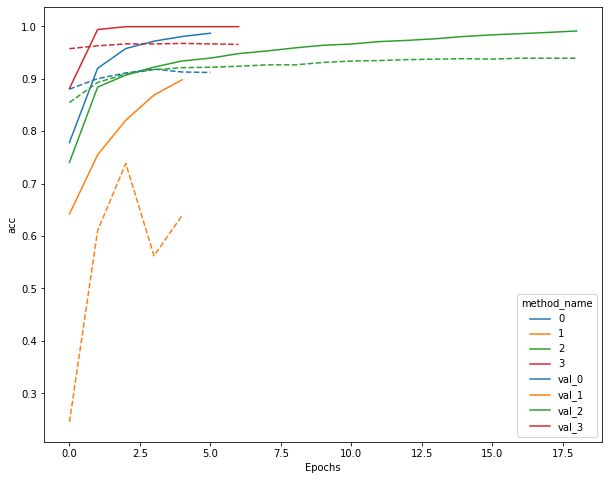

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
method_names = [
  'ResNet Transfer lerning',
  'ResNet Fine-Tune',
  'ResNetWide Transfer lerning',
  'ResNetWide Fine-Tune',
]

plot_df = pd.DataFrame()

for i, history in enumerate(histories):
    # method_name = str(method_names[i])
    method_name = str(i)
    history_df = pd.DataFrame(history.history)
    history_df['method_name'] = method_name
    history_df['Epochs'] = history_df.index
    plot_df = pd.concat([plot_df, history_df], ignore_index=True)

sns.lineplot(data=plot_df, x=plot_df['Epochs'], y='acc', hue='method_name')
val_plot_df = plot_df
val_plot_df['method_name'] = plot_df['method_name'].apply(lambda x: 'val_' + x)
sns.lineplot(data=val_plot_df, x=plot_df['Epochs'], y='val_acc', hue='method_name', linestyle='dashed')

# EfficientNet

2019年に開発されたEfficientNet モデル群は、効率的なスケールアップの規則を採用することで、開発当時の最高水準の精度を上回り、同時にパラメータ数を大幅に減少。  
幅、深さ、解像度などを何倍増やすかは、複合係数（Compound Coefficient）を導入することで最適化。  
Compound Coefficientに基づいて、深さ・広さ・解像度を最適化したことにより、「小さなモデル」かつ高い精度を達成  
•モデルが小さい（パラメータ数が少ない）→効率化（小型化と動作の高速化）   

・EfficientNetは精度と効率の両側面で優れている  
・パラメータの数と計算量は数倍〜１桁減少  
・ResNet-50に比べてEfficientNet-B4は同程度の処理速度と計算量で精度が6.3%改善  
・EfficientNetは、転移学習でも性能を発揮（シンプルかつ簡潔な構造、汎用性が高い）

・Compound Scaling Method（複合スケーリング手法）を用いることで、最適化問題「与えられた制約の中である目的関数を大きく、または小さくする解を求めること」として定式化することができる



#物体検知とSS解説


物体検出はClassification< Object Detection < Semantic Segmentation < Instance Segmentationの順に、難易度が上がる。  
2020年時点の代表的なデータセットに、VOC12,ISLVRC17,MSCOCO18,OICOD18がある。  
VOC12はアイコン的な写りで日常感とはかけ離れていたが、MSCOCO以降は部分的な重なり等も見られる日常生活のコンテキストに近い。目的に応じたBox/画像の選択が重要であり、クラス数が大きいことが嬉しいわけでもない。そのため、分類問題のための評価指標を用い選択する。また、物体検出においてはクラスラベルだけでなく、物体位置の予測精度も評価したいため、IoU(Intersection over union)という指標を用いる。  

IoU閾値0.5で固定

・Average Precision

$AP=\int_{0}^{1}P(R)dR$

・Mean Average Precision

$mAP=\frac{1}{C}\sum_{i=1}^{C}AP_i$

MSCOCOにおいては0.5から0.95まで0.05刻みでAP＆mAPを計算し算術平均を計算。

・FPS:Flames per Second  
応用上の要請から, 検出精度に加え検出速度も問題となる

Average PrecisionとFlames per Secondのは概ねトレードオフである。

物体検知に関しては物体検知に関しては2012以降発展してきたが、候補領域の検出とクラス推定を同時に行う１段階検出器（One-stage detector）と候補領域の検出とクラス推定を別々に行う２段階検出器（Two-stage detector）がある。  
1段階検出器は精度が低いが、計算量が小さく推論も早い傾向があり、2段階検出器は精度は高いが、計算量が大きく推論が遅い傾向がある。  
1段階検出器の代表例にYOLO,SSDがあり、2段階検出器の代表例ににRCNNがある。

・SSD(Single Shot Detector)  
SSD in a nutshell  
1.Default Boxを用意  
2.Defalut Boxを変形し、confを出力  

SSDの特徴の一つはマルチスケール特徴マップ  
SSDのDefault Boxは各特徴に４つや６つ 

多数のDefault Boxを用意したことで生ずる問題への対処として、Non-Maximum SuppressionとHard Negative Mining  

・Semantic Segmentation
upSamplingの壁が存在する  
Poolingによりローカルな情報（≒輪郭）が失われていくため、低レイヤーPooling層の出力をelement-wise addition することでローカルな情報を補完してからUp-sampling


# Mask R-CNN

・Mask R-CNNは、Faster R-CNNを拡張したアルゴリズム  
・Mask R-CNNはインスタンスセグメンテーションに対応するので、Faster R-CNNの物体検出機能にセグメンテーションの機能を付加したイメージ
・バウンディングボックス内の画素単位でクラス分類を行うため、物体の形も推定可能
（原論文）https://arxiv.org/abs/1703.06870  
 •Mask R-CNN はICCV2017 のBest Paper に選出※ ICCV （International Conference on Computer Vision）はコンピュータービジョンの最高峰のカンファレンス  

○Mask R-CNNの特徴    
画像中の物体らしき領域とその領域にあるクラスを検出  
・セグメンテーションとは画像中の画素ごとにクラスを検出すること  
・Mask R-CNNは、画像全体ではなく、物体検出の結果として得られた領域についてのみセグメンテーションを行うことで効率アップ  
・「物体らしさ」が閾値以上の領域にのみ絞り、領域毎に最も確率が高いクラスを採用    
学習済みのMask R-CNNモデルで行われたセグメントの例：人物の姿勢の推定、関節等のキーポイントまで検出可能

Mask R-CNNはFaster R-CNNと構造に類似点が多い  

Mask R-CNNは特徴マップ畳み込み処理後、物体クラス（分類の結果）、バウンディングボックス（回帰の結果）、物体領域マスクの推定（ピクセルの分類）にネットワークが分岐する  

RoI Pooingの代わりに、Mask R-CNNでは新しい手法RoI Alignを導入している  

○RoI Align  
手順まとめ
1.N x Nの特徴マップにしたい場合、N x Nの領域に分割する  
2.その領域一つ一つについて4つの点を打つ  
3.一つ一つの点について、周りの四つのピクセルを使い、何らかの補間法で点の値を求める  
4.四つの点を一つにまとめる



# FCOS

FCOS( FCOS: Fully Convolutional One-Stage Object Detection )はアンカーボックス法の精度を超えたアンカーフリーの物体検出である。  
FCOSでは複数のサイズの特徴マップを生成する手法FPN（Feature Pyramid Networks）を使っている。 低解像度の特徴は全体の特徴を捉えやすく、意味に強く、高解像度の特徴は細かい部分に強いが、意味に弱いが両方の良いところを取り入れたのがFPNである。ambiguous sampleはFCOSで問題にならない。
4次元ベクトルの計算の仕方として、4次元ベクトルのラベルを使ったデータセットがあるわけではなく、バウンディングボックスがラベルのデータセットを加工して使っている。  


・ネットワークの出力について  
クラスラベルの出力H x W x C の大きさのテンソルが出力つまり、ピクセルごとに各クラスごとのスコアが出力される。四次元ベクトルの出力H x W x 4ピクセルを中央の点とみなし、全てのピクセルからの四次元ベクトルを予測する。
  
・四次元ベクトルのポジティブサンプルとネガティブサンプルの分け方  
中央の点x, yがラベルのボックスの中に入っていて、なおかつその位置の予測されたクラスとラベルのクラスが一致した場合、ポジティブサンプルとみなす。それ以外はネガティブサンプル。

・FCOSの唯一の後処理Non-Maximam Suppressionについて  
1.まず、モデルがスコアを出力する     
2.一番スコアが高いバウンディングボックスをまず出力とする  
3.次に、出力としたバウンディングボックスと他のもののIoUを計算する  

FCOSの手法は、アンカーベースの手法のデメリットを回避し、アンカーベースに匹敵もしくは超える精度を出している  







# Transformer

・Seq2seq    
系列(Sequence)を入力として、系列を出力するもの  
Encoder-Decoderモデルとも呼ばれる  
入力系列がEncode(内部状態に変換)され、内部状態からDecode(系列に変換)する  
実応用上も、入力・出力共に系列情報なものは多い  
翻訳 (英語→日本語) - 音声認識 (波形→テキスト) - チャットボット (テキスト→テキスト)  

・Transformer
Transformer (Vaswani et al., 2017) Attention is all you need
2017年6月に登場RNNを使わない  
必要なのはAttentionだけ  
当時のSOTAをはるかに少ない計算量で実現  
英仏 (3600万文) の学習を8GPUで3.5日で完了  


## 実装演習/Seq2Seq

In [ ]:
#Sequence-to-Sequence (Seq2Seq) モデルは、系列を入力として系列を出力するモデルです。
#入力系列をRNNで固定長のベクトルに変換(= Encode)し、そのベクトルを用いて系列を出力(= Decode)することから、Encoder-Decoder モデルとも呼ばれます。
#RNNの代わりにLSTMやGRUでも可能です。
#機械翻訳のほか、文書要約や対話生成にも使われます。<br>
#今回は機械翻訳を例にとって解説していきます。

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7004003542708826414
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18325279345209642499
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
pip install -U torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 19 kB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.12.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.12.0 which is incompatible.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 

In [ ]:
! wget https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
! mkdir images data

# data取得
! wget https://www.dropbox.com/s/o4kyc52a8we25wy/dev.en -P data/
! wget https://www.dropbox.com/s/kdgskm5hzg6znuc/dev.ja -P data/
! wget https://www.dropbox.com/s/gyyx4gohv9v65uh/test.en -P data/
! wget https://www.dropbox.com/s/hotxwbgoe2n013k/test.ja -P data/
! wget https://www.dropbox.com/s/5lsftkmb20ay9e1/train.en -P data/
! wget https://www.dropbox.com/s/ak53qirssci6f1j/train.ja -P data/

--2022-07-04 07:04:36--  https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9narw5x4uizmehh/utils.py [following]
--2022-07-04 07:04:37--  https://www.dropbox.com/s/raw/9narw5x4uizmehh/utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1c6b00b9f3ec947829af2bc23e.dl.dropboxusercontent.com/cd/0/inline/BobeiRi_EU6ZUXEkVLfr_RX338Z-smz1P1ugTsJZCKtJCM3OOt0SJNduzM4znHnhmsUsooRMAV3cil_NBLBXPtDh5KOd9nlcVT6x3jdS7e7Dpcuzw8a0FZvh_bNzi2tVbN_4_fMFqSSN0tFXNMGgYdGuTNfV6YTVq9p_G9jYbWIAxQ/file# [following]
--2022-07-04 07:04:37--  https://uc1c6b00b9f3ec947829af2bc23e.dl.dropboxusercontent.com/cd/0/inline/BobeiRi_EU6ZUXEkVLfr_RX338Z-smz1P1ugTsJZCKtJCM3OOt0SJNduzM4znHnhmsUsooRMAV3ci

In [ ]:
! ls data

dev.en	dev.ja	test.en  test.ja  train.en  train.ja


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk import bleu_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence
from utils import Vocab

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(1)
random_state = 42

print(torch.__version__)

1.12.0+cu102


In [ ]:
# 1.データセットの準備
#英語-日本語の対訳コーパスである、Tanaka Corpus ( http://www.edrdg.org/wiki/index.php/Tanaka_Corpus )を使います。<br>
#今回はそのうちの一部分を取り出したsmall_parallel_enja: 50k En/Ja Parallel Corpus for Testing SMT Methods ( https://github.com/odashi/small_parallel_enja )を使用します。

#train.enとtrain.jaの中身を見てみましょう。

! head -10 data/train.en

i can 't tell who will arrive first .
many animals have been destroyed by men .
i 'm in the tennis club .
emi looks happy .
please bear this fact in mind .
she takes care of my children .
we want to be international .
you ought not to break your promise .
when you cross the street , watch out for cars .
i have nothing to live for .


In [ ]:
! head -10 ./data/train.ja

誰 が 一番 に 着 く か 私 に は 分か り ま せ ん 。
多く の 動物 が 人間 に よ っ て 滅ぼ さ れ た 。
私 は テニス 部員 で す 。
エミ は 幸せ そう に 見え ま す 。
この 事実 を 心 に 留め て お い て 下さ い 。
彼女 は 私 たち の 世話 を し て くれ る 。
私 達 は 国際 人 に な り た い と 思 い ま す 。
約束 を 破 る べ き で は あ り ま せ ん 。
道路 を 横切 る とき は 車 に 注意 し なさ い 。
私 に は 生き 甲斐 が な い 。


In [ ]:
# データの読み込みとデータの分割
def load_data(file_path):
    # テキストファイルからデータを読み込むメソッド
    data = []
    for line in open(file_path, encoding='utf-8'):
        words = line.strip().split()  # スペースで単語を分割
        data.append(words)
    return data

In [ ]:
train_X = load_data('./data/train.en')
train_Y = load_data('./data/train.ja')

In [ ]:
# 訓練データと検証データに分割
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)

In [ ]:
print('train data', train_X[0])
print('valid data', valid_X[0])

train data ['where', 'shall', 'we', 'eat', 'tonight', '?']
valid data ['you', 'may', 'extend', 'your', 'stay', 'in', 'tokyo', '.']


In [ ]:
#単語辞書
#データセットに登場する各単語にIDを割り振る
# まず特殊トークンを定義しておく
PAD_TOKEN = '<PAD>'  # バッチ処理の際に、短い系列の末尾を埋めるために使う （Padding）
BOS_TOKEN = '<S>'  # 系列の始まりを表す （Beggining of sentence）
EOS_TOKEN = '</S>'  # 系列の終わりを表す （End of sentence）
UNK_TOKEN = '<UNK>'  # 語彙に存在しない単語を表す （Unknown）
PAD = 0
BOS = 1
EOS = 2
UNK = 3

In [ ]:
MIN_COUNT = 2  # 語彙に含める単語の最低出現回数 再提出現回数に満たない単語はUNKに置き換えられる

# 単語をIDに変換する辞書の初期値を設定
word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

# 単語辞書を作成
vocab_X = Vocab(word2id=word2id)
vocab_Y = Vocab(word2id=word2id)
vocab_X.build_vocab(train_X, min_count=MIN_COUNT)
vocab_Y.build_vocab(train_Y, min_count=MIN_COUNT)

In [ ]:
vocab_size_X = len(vocab_X.id2word)
vocab_size_Y = len(vocab_Y.id2word)
print('入力言語の語彙数：', vocab_size_X)
print('出力言語の語彙数：', vocab_size_Y)

入力言語の語彙数： 3725
出力言語の語彙数： 4405


In [ ]:
#テンソルへの変換変換
#IDへの変換
#まずはモデルが文章を認識できるように、文章を単語IDのリストに変換します
def sentence_to_ids(vocab, sentence):
    # 単語(str)のリストをID(int)のリストに変換する関数
    ids = [vocab.word2id.get(word, UNK) for word in sentence]
    ids += [EOS]  # EOSを加える
    return ids

In [ ]:
train_X = [sentence_to_ids(vocab_X, sentence) for sentence in train_X]
train_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in train_Y]
valid_X = [sentence_to_ids(vocab_X, sentence) for sentence in valid_X]
valid_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in valid_Y]

In [ ]:
print('train data', train_X[0])
print('valid data', valid_X[0])

train data [132, 321, 28, 290, 367, 12, 2]
valid data [8, 93, 3532, 36, 236, 13, 284, 4, 2]


In [ ]:
### 2.2 DataLoaderの定義
#データセットからバッチを取得するデータローダーを定義します
#- この際、長さの異なる複数の系列をバッチで並列に扱えるように、短い系列の末尾を特定のシンボル（`<PAD>`など）でパディングし、バッチ内の系列の長さを最長のものに合わせる
#- (batch_size, max_length)のサイズの行列を得るが、実際にモデルを学習させるときには、バッチをまたいで各時刻ごとに進めていくので、転置して(max_length, batch_size)の形に変える<br>（batch_first=Trueのオプションを使う場合は不要）

def pad_seq(seq, max_length):
    # 系列(seq)が指定の文長(max_length)になるように末尾をパディングする
    res = seq + [PAD for i in range(max_length - len(seq))]
    return res    


class DataLoader(object):

    def __init__(self, X, Y, batch_size, shuffle=False):
        """
        :param X: list, 入力言語の文章（単語IDのリスト）のリスト
        :param Y: list, 出力言語の文章（単語IDのリスト）のリスト
        :param batch_size: int, バッチサイズ
        :param shuffle: bool, サンプルの順番をシャッフルするか否か
        """
        self.data = list(zip(X, Y))
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.start_index = 0
        
        self.reset()
    
    def reset(self):
        if self.shuffle:  # サンプルの順番をシャッフルする
            self.data = shuffle(self.data, random_state=random_state)
        self.start_index = 0  # ポインタの位置を初期化する
    
    def __iter__(self):
        return self

    def __next__(self):
        # ポインタが最後まで到達したら初期化する
        if self.start_index >= len(self.data):
            self.reset()
            raise StopIteration()

        # バッチを取得
        seqs_X, seqs_Y = zip(*self.data[self.start_index:self.start_index+self.batch_size])
        # 入力系列seqs_Xの文章の長さ順（降順）に系列ペアをソートする
        seq_pairs = sorted(zip(seqs_X, seqs_Y), key=lambda p: len(p[0]), reverse=True)
        seqs_X, seqs_Y = zip(*seq_pairs)
        # 短い系列の末尾をパディングする
        lengths_X = [len(s) for s in seqs_X]  # 後述のEncoderのpack_padded_sequenceでも用いる
        lengths_Y = [len(s) for s in seqs_Y]
        max_length_X = max(lengths_X)
        max_length_Y = max(lengths_Y)
        padded_X = [pad_seq(s, max_length_X) for s in seqs_X]
        padded_Y = [pad_seq(s, max_length_Y) for s in seqs_Y]
        # tensorに変換し、転置する
        batch_X = torch.tensor(padded_X, dtype=torch.long, device=device).transpose(0, 1)
        batch_Y = torch.tensor(padded_Y, dtype=torch.long, device=device).transpose(0, 1)

        # ポインタを更新する
        self.start_index += self.batch_size

        return batch_X, batch_Y, lengths_X

In [ ]:
#モデルの構築
#EncoderとDecoderのRNNを定義します。
### 導入：PackedSequence
#PyTorchのRNNでは、可変長の系列のバッチを効率よく計算できるように系列を表現する`PackedSequence`というクラスを用いることができます。
#入力バッチのテンソルをこの`PackedSequence`のインスタンスに変換してからRNNに入力することで、パディング部分の計算を省略することができるため、効率的な計算が可能になります。
#`PackedSequence`を作成するには、まず、系列長の異なるバッチに対してパディングを行なってください。
#ここで、パディングを行う前に各サンプルの系列長(`lengths`)を保存しておきます。

In [ ]:
# 系列長がそれぞれ4,3,2の3つのサンプルからなるバッチを作成
batch = [[1,2,3,4], [5,6,7], [8,9]]
lengths = [len(sample) for sample in batch]
print('各サンプルの系列長:', lengths)
print()

# 最大系列長に合うように各サンプルをpadding
_max_length = max(lengths)
padded = torch.tensor([pad_seq(sample, _max_length) for sample in batch])
print('paddingされたテンソル:\n', padded)
padded = padded.transpose(0,1) # (max_length, batch_size)に転置
print('padding & 転置されたテンソル:\n', padded)
print('padding & 転置されたテンソルのサイズ:\n', padded.size())
print()

各サンプルの系列長: [4, 3, 2]

paddingされたテンソル:
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 0],
        [8, 9, 0, 0]])
padding & 転置されたテンソル:
 tensor([[1, 5, 8],
        [2, 6, 9],
        [3, 7, 0],
        [4, 0, 0]])
padding & 転置されたテンソルのサイズ:
 torch.Size([4, 3])



In [ ]:
#次に、パディングを行ったテンソル(`padded`)と各サンプルの元々の系列長(`lengths`)を`torch.nn.utils.rnn.pack_padded_sequence`という関数に与えると、
#`data`と`batch_sizes`という要素を持った`PackedSequence`のインスタンス(`packed`)が作成できます。
#- `data`: テンソルの`PAD`以外の値のみを保有するベクトル
#- `batch_sizes`: 各時刻で計算が必要な(=`PAD`に到達していない)バッチの数を表すベクトル
# PackedSequenceに変換（テンソルをRNNに入力する前に適用する）
packed = pack_padded_sequence(padded, lengths=lengths) # 各サンプルの系列長も与える
print('PackedSequenceのインスタンス:\n', packed) # テンソルのPAD以外の値(data)と各時刻で計算が必要な(=PADに到達していない)バッチの数(batch_sizes)を有するインスタンス
print()

PackedSequenceのインスタンス:
 PackedSequence(data=tensor([1, 5, 8, 2, 6, 9, 3, 7, 4]), batch_sizes=tensor([3, 3, 2, 1]), sorted_indices=None, unsorted_indices=None)



In [ ]:
#こうして得られた`PackedSequence`のインスタンスをRNNに入力します。（ここでは省略）
#RNNから出力されたテンソルは`PackedSeauence`のインスタンスのままなので、後段の計算につなぐために`torch.nn.utils.rnn.pad_packed_sequence`の関数によって通常のテンソルに戻します。
# PackedSequenceのインスタンスをRNNに入力する（ここでは省略）
output = packed

# テンソルに戻す(RNNの出力に対して適用する)
output, _length = pad_packed_sequence(output)  # PADを含む元のテンソルと各サンプルの系列長を返す
print('PADを含む元のテンソル:\n', output)
print('各サンプルの系列長:', _length)


PADを含む元のテンソル:
 tensor([[1, 5, 8],
        [2, 6, 9],
        [3, 7, 0],
        [4, 0, 0]])
各サンプルの系列長: tensor([4, 3, 2])


In [ ]:
### Encoder
#今回はEncoder側でバッチを処理する際に、`pack_padded_sequence`関数によってtensorを`PackedSequence`に変換し、処理を終えた後に`pad_packed_sequence`関数によってtensorに戻すという処理を行います。
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, seqs, input_lengths, hidden=None):
        """
        :param seqs: tensor, 入力のバッチ, size=(max_length, batch_size)
        :param input_lengths: 入力のバッチの各サンプルの文長
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Encoderの出力, size=(max_length, batch_size, hidden_size)
        :return hidden: tensor, Encoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs) # seqsはパディング済み
        packed = pack_padded_sequence(emb, input_lengths) # PackedSequenceオブジェクトに変換
        output, hidden = self.gru(packed, hidden)
        output, _ = pad_packed_sequence(output)
        return output, hidden

In [ ]:
### Decoder
#今回はDecoder側ではパディング等行わないので、通常のtensorのままRNNに入力して問題ありません。

class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        """
        :param hidden_size: int, 隠れ層のユニット数
        :param output_size: int, 出力言語の語彙数
        :param dropout: float, ドロップアウト率
        """
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, seqs, hidden):
        """
        :param seqs: tensor, 入力のバッチ, size=(1, batch_size)
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Decoderの出力, size=(1, batch_size, output_size)
        :return hidden: tensor, Decoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs)
        output, hidden = self.gru(emb, hidden)
        output = self.out(output)
        return output, hidden

## EncoderDecoder
上で定義したEncoderとDecoderを用いた、一連の処理をまとめるEncoderDecoderのクラスを定義します。

ここで、Decoder側の処理で注意する点があります。

RNNでは、時刻$t$の出力を時刻$t+1$の入力とすることができるが、この方法でDecoderを学習させると連鎖的に誤差が大きくなっていき、学習が不安定になったり収束が遅くなったりする問題が発生します。


この問題への対策として**Teacher Forcing**というテクニックがあります。
これは、訓練時にはDecoder側の入力に、ターゲット系列（参照訳）をそのまま使うというものです。
これにより学習が安定し、収束が早くなるというメリットがありますが、逆に評価時は前の時刻にDecoderが生成したものが使われるため、学習時と分布が異なってしまうというデメリットもあります。


Teacher Forcingの拡張として、ターゲット系列を入力とするか生成された結果を入力とするかを確率的にサンプリングする**Scheduled Sampling**という手法があります。

ここではScheduled Samplingを採用し、一定の確率に基づいてターゲット系列を入力とするか生成された結果を入力とするかを切り替えられるようにクラスを定義しておきます。

In [ ]:
class EncoderDecoder(nn.Module):
    """EncoderとDecoderの処理をまとめる"""
    def __init__(self, input_size, output_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(EncoderDecoder, self).__init__()
        self.encoder = Encoder(input_size, hidden_size)
        self.decoder = Decoder(hidden_size, output_size)

    def forward(self, batch_X, lengths_X, max_length, batch_Y=None, use_teacher_forcing=False):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :param batch_Y: tensor, Decoderで用いるターゲット系列
        :param use_teacher_forcing: Decoderでターゲット系列を入力とするフラグ
        :return decoder_outputs: tensor, Decoderの出力, 
            size=(max_length, batch_size, self.decoder.output_size)
        """
        # encoderに系列を入力（複数時刻をまとめて処理）
        _, encoder_hidden = self.encoder(batch_X, lengths_X)
        
        _batch_size = batch_X.size(1)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * _batch_size, dtype=torch.long, device=device) # 最初の入力にはBOSを使用する
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden  # Encoderの最終隠れ状態を取得

        # decoderの出力のホルダーを定義
        decoder_outputs = torch.zeros(max_length, _batch_size, self.decoder.output_size, device=device) # max_length分の固定長

        # 各時刻ごとに処理
        for t in range(max_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_outputs[t] = decoder_output
            # 次の時刻のdecoderの入力を決定
            if use_teacher_forcing and batch_Y is not None:  # teacher forceの場合、ターゲット系列を用いる
                decoder_input = batch_Y[t].unsqueeze(0)
            else:  # teacher forceでない場合、自身の出力を用いる
                decoder_input = decoder_output.max(-1)[1]
                
        return decoder_outputs

In [ ]:
# 4.訓練
### 4.1 損失関数の定義
#基本的にはクロスエントロピーを損失関数として用いますが、パディングを行うと短い系列の末尾には`<PAD>`トークンが入るため、この部分の損失を計算しないように、マスクをかけます。
mce = nn.CrossEntropyLoss(size_average=False, ignore_index=PAD) # PADを無視する
def masked_cross_entropy(logits, target):
    logits_flat = logits.view(-1, logits.size(-1)) # (max_seq_len * batch_size, output_size)
    target_flat = target.view(-1) # (max_seq_len * batch_size, 1)
    return mce(logits_flat, target_flat)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# 学習
# ハイパーパラメータの設定
num_epochs = 10
batch_size = 64
lr = 1e-3  # 学習率
teacher_forcing_rate = 0.2  # Teacher Forcingを行う確率
ckpt_path = 'model.pth'  # 学習済みのモデルを保存するパス

model_args = {
    'input_size': vocab_size_X,
    'output_size': vocab_size_Y,
    'hidden_size': 256,
}

In [ ]:
# データローダを定義
train_dataloader = DataLoader(train_X, train_Y, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_X, valid_Y, batch_size=batch_size, shuffle=False)

# モデルとOptimizerを定義
model = EncoderDecoder(**model_args).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
# 実際に損失関数を計算する関数を定義します。
def compute_loss(batch_X, batch_Y, lengths_X, model, optimizer=None, is_train=True):
    # 損失を計算する関数
    model.train(is_train)  # train/evalモードの切替え
    
    # 一定確率でTeacher Forcingを行う
    use_teacher_forcing = is_train and (random.random() < teacher_forcing_rate)
    max_length = batch_Y.size(0)
    # 推論
    pred_Y = model(batch_X, lengths_X, max_length, batch_Y, use_teacher_forcing)
    
    # 損失関数を計算
    loss = masked_cross_entropy(pred_Y.contiguous(), batch_Y.contiguous())
    
    if is_train:  # 訓練時はパラメータを更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    batch_Y = batch_Y.transpose(0, 1).contiguous().data.cpu().tolist()
    pred = pred_Y.max(dim=-1)[1].data.cpu().numpy().T.tolist()

    return loss.item(), batch_Y, pred

In [ ]:
#ここで、Loss以外に、学習の進捗を確認するためにモデルの性能を評価する指標として、BLEUを計算します。
#BLEUは機械翻訳の分野において最も一般的な自動評価基準の一つで、予め用意した複数の参照訳と、機械翻訳モデルが出力した訳のn-gramのマッチ率に基づく指標です。
#NLTK (Natural Language Tool Kit) という自然言語処理で用いられるライブラリを用いて簡単に計算することができます。
def calc_bleu(refs, hyps):
    """
    BLEUスコアを計算する関数
    :param refs: list, 参照訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :param hyps: list, モデルの生成した訳。単語のリストのリスト (例： ['I', 'have', 'a', 'pen'])
    :return: float, BLEUスコア(0~100)
    """
    refs = [[ref[:ref.index(EOS)]] for ref in refs] # EOSは評価しないで良いので切り捨てる, refsのほうは複数なのでlistが一個多くかかっている
    hyps = [hyp[:hyp.index(EOS)] if EOS in hyp else hyp for hyp in hyps]
    return 100 * bleu_score.corpus_bleu(refs, hyps)

In [ ]:
# 訓練
best_valid_bleu = 0.

for epoch in range(1, num_epochs+1):
    train_loss = 0.
    train_refs = []
    train_hyps = []
    valid_loss = 0.
    valid_refs = []
    valid_hyps = []
    # train
    for batch in train_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, optimizer, 
            is_train=True
            )
        train_loss += loss
        train_refs += gold
        train_hyps += pred
    # valid
    for batch in valid_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, 
            is_train=False
            )
        valid_loss += loss
        valid_refs += gold
        valid_hyps += pred
    # 損失をサンプル数で割って正規化
    train_loss = np.sum(train_loss) / len(train_dataloader.data)
    valid_loss = np.sum(valid_loss) / len(valid_dataloader.data)
    # BLEUを計算
    train_bleu = calc_bleu(train_refs, train_hyps)
    valid_bleu = calc_bleu(valid_refs, valid_hyps)

    # validationデータでBLEUが改善した場合にはモデルを保存
    if valid_bleu > best_valid_bleu:
        ckpt = model.state_dict()
        torch.save(ckpt, ckpt_path)
        best_valid_bleu = valid_bleu

    print('Epoch {}: train_loss: {:5.2f}  train_bleu: {:2.2f}  valid_loss: {:5.2f}  valid_bleu: {:2.2f}'.format(
            epoch, train_loss, train_bleu, valid_loss, valid_bleu))
        
    print('-'*80)

Epoch 1: train_loss: 52.39  train_bleu: 3.39  valid_loss: 48.26  valid_bleu: 3.98
--------------------------------------------------------------------------------
Epoch 2: train_loss: 44.08  train_bleu: 7.92  valid_loss: 44.48  valid_bleu: 8.24
--------------------------------------------------------------------------------
Epoch 3: train_loss: 39.79  train_bleu: 11.73  valid_loss: 41.84  valid_bleu: 10.67
--------------------------------------------------------------------------------
Epoch 4: train_loss: 36.51  train_bleu: 15.08  valid_loss: 41.50  valid_bleu: 15.00
--------------------------------------------------------------------------------
Epoch 5: train_loss: 34.64  train_bleu: 17.36  valid_loss: 40.14  valid_bleu: 15.03
--------------------------------------------------------------------------------
Epoch 6: train_loss: 32.44  train_bleu: 19.92  valid_loss: 40.19  valid_bleu: 16.77
--------------------------------------------------------------------------------
Epoch 7: train

In [ ]:
# 評価
# 学習済みモデルの読み込み
ckpt = torch.load(ckpt_path) # cpuで処理する場合はmap_locationで指定する必要があります。
model.load_state_dict(ckpt)
model.eval()

EncoderDecoder(
  (encoder): Encoder(
    (embedding): Embedding(3725, 256, padding_idx=0)
    (gru): GRU(256, 256)
  )
  (decoder): Decoder(
    (embedding): Embedding(4405, 256, padding_idx=0)
    (gru): GRU(256, 256)
    (out): Linear(in_features=256, out_features=4405, bias=True)
  )
)

In [ ]:
def ids_to_sentence(vocab, ids):
    # IDのリストを単語のリストに変換する
    return [vocab.id2word[_id] for _id in ids]

def trim_eos(ids):
    # IDのリストからEOS以降の単語を除外する
    if EOS in ids:
        return ids[:ids.index(EOS)]
    else:
        return ids

In [ ]:
# テストデータの読み込み
test_X = load_data('./data/dev.en')
test_Y = load_data('./data/dev.ja')

In [ ]:
test_X = [sentence_to_ids(vocab_X, sentence) for sentence in test_X]
test_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in test_Y]

In [ ]:
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)

In [ ]:
# 生成
batch_X, batch_Y, lengths_X = next(test_dataloader)
sentence_X = ' '.join(ids_to_sentence(vocab_X, batch_X.data.cpu().numpy()[:-1, 0]))
sentence_Y = ' '.join(ids_to_sentence(vocab_Y, batch_Y.data.cpu().numpy()[:-1, 0]))
print('src: {}'.format(sentence_X))
print('tgt: {}'.format(sentence_Y))

output = model(batch_X, lengths_X, max_length=20)
output = output.max(dim=-1)[1].view(-1).data.cpu().tolist()
output_sentence = ' '.join(ids_to_sentence(vocab_Y, trim_eos(output)))
output_sentence_without_trim = ' '.join(ids_to_sentence(vocab_Y, output))
print('out: {}'.format(output_sentence))
print('without trim: {}'.format(output_sentence_without_trim))

src: show your own business .
tgt: 自分 の 事 を しろ 。
out: 自分 の 仕事 を <UNK> し なさ い 。
without trim: 自分 の 仕事 を <UNK> し なさ い 。 </S> </S> </S> </S> </S> </S> </S> </S> </S> </S> </S>


In [ ]:
# BLEUの計算
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)
refs_list = []
hyp_list = []

for batch in test_dataloader:
    batch_X, batch_Y, lengths_X = batch
    pred_Y = model(batch_X, lengths_X, max_length=20)
    pred = pred_Y.max(dim=-1)[1].view(-1).data.cpu().tolist()
    refs = batch_Y.view(-1).data.cpu().tolist()
    refs_list.append(refs)
    hyp_list.append(pred)
bleu = calc_bleu(refs_list, hyp_list)
print(bleu)

16.793633843166962


In [ ]:
### Beam Search
#テストデータに対して新たな文を生成する際、これまでは各時刻で最も確率の高い単語を正解として採用し、次のステップでの入力として使っていました。
#ただ、本当にやりたいのは、文全体の尤度が最も高くなるような文を生成することです。そのため、ただ近視眼的に確率の高い単語を採用していくより、もう少し大局的に評価していく必要があります。
#Beam Searchでは、各時刻において一定の数$K$のそれまでのスコア(対数尤度など)の高い文を保持しながら選択を行っていきます。  
class BeamEncoderDecoder(EncoderDecoder):
    """
    Beam Searchでdecodeを行うためのクラス
    """
    def __init__(self, input_size, output_size, hidden_size, beam_size=4):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        :param beam_size: int, ビーム数
        """
        super(BeamEncoderDecoder, self).__init__(input_size, output_size, hidden_size)
        self.beam_size = beam_size

    def forward(self, batch_X, lengths_X, max_length):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :return decoder_outputs: list, 各ビームのDecoderの出力
        :return finished_scores: list of float, 各ビームのスコア
        """
        _, encoder_hidden = self.encoder(batch_X, lengths_X)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * self.beam_size, dtype=torch.long, device=device)
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden

        # beam_sizeの数だけrepeatする
        decoder_input = decoder_input.expand(1, beam_size)
        decoder_hidden = decoder_hidden.expand(1, beam_size, -1).contiguous()

        k = beam_size
        finished_beams = []
        finished_scores = []
        prev_probs = torch.zeros(beam_size, 1, dtype=torch.float, device=device)  # 前の時刻の各ビームの対数尤度を保持しておく
        output_size = self.decoder.output_size

        # 各時刻ごとに処理
        for t in range(max_length):
            # decoder_input: (1, k)
            decoder_output, decoder_hidden = self.decoder(decoder_input[-1:], decoder_hidden)
            # decoder_output: (1, k, output_size)
            # decoder_hidden: (1, k, hidden_size)
            decoder_output_t = decoder_output[-1]  # (k, output_size)
            log_probs = prev_probs + F.log_softmax(decoder_output_t, dim=-1)  # (k, output_size)
            scores = log_probs  # 対数尤度をスコアとする

            # スコアの高いビームとその単語を取得
            flat_scores = scores.view(-1)  # (k*output_size,)
            if t == 0:
                flat_scores = flat_scores[:output_size]  # t=0のときは後半の同じ値の繰り返しを除外
            top_vs, top_is = flat_scores.data.topk(k)
            beam_indices = top_is / output_size  # (k,)
            word_indices = top_is % output_size  # (k,)
            
            # ビームを更新する
            _next_beam_indices = []
            _next_word_indices = []
            for b, w in zip(beam_indices, word_indices):
                if w.item() == EOS:  # EOSに到達した場合はそのビームは更新して終了
                    k -= 1
                    beam = torch.cat([decoder_input.t()[b], w.view(1,)])  # (t+2,)
                    score = scores[b, w].item()
                    finished_beams.append(beam)
                    finished_scores.append(score)
                else:   # それ以外の場合はビームを更新
                    _next_beam_indices.append(b)
                    _next_word_indices.append(w)
            if k == 0:
                break

            # tensorｎに変換
            next_beam_indices = torch.tensor(_next_beam_indices, device=device)
            next_word_indices = torch.tensor(_next_word_indices, device=device)

            # 次の時刻のDecoderの入力を更新
            decoder_input = torch.index_select(
                decoder_input, dim=-1, index=next_beam_indices)
            decoder_input = torch.cat(
                [decoder_input, next_word_indices.unsqueeze(0)], dim=0)
    
            # 次の時刻のDecoderの隠れ層を更新
            decoder_hidden = torch.index_select(
                decoder_hidden, dim=1, index=next_beam_indices)

            # 各ビームの対数尤度を更新
            flat_probs = log_probs.view(-1)  # (k*output_size,)
            next_indices = (next_beam_indices + 1) * next_word_indices
            prev_probs = torch.index_select(
                flat_probs, dim=0, index=next_indices).unsqueeze(1)  # (k, 1)

        # すべてのビームが完了したらデータを整形
        decoder_outputs = [[idx.item() for idx in beam[1:-1]] for beam in finished_beams]
        
        return decoder_outputs, finished_scores

In [ ]:
# 学習済みモデルの読み込み
beam_size = 3
beam_model = BeamEncoderDecoder(**model_args, beam_size=beam_size).to(device)
beam_model.load_state_dict(ckpt)
beam_model.eval()

BeamEncoderDecoder(
  (encoder): Encoder(
    (embedding): Embedding(3725, 256, padding_idx=0)
    (gru): GRU(256, 256)
  )
  (decoder): Decoder(
    (embedding): Embedding(4405, 256, padding_idx=0)
    (gru): GRU(256, 256)
    (out): Linear(in_features=256, out_features=4405, bias=True)
  )
)

In [ ]:
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)

## 実装演習/Transformer
こちらの実装は応用課題ということでパスします。Seq2Seqの実装と同じくらい時間がかかる。

# BERT

○BERT
Fine-tuningアプローチの事前学習に工夫を加えた双方向Transformer  tensorを入力としtensorを出力  
モデルの中に未来情報のリークを防ぐためのマスクが存在しない  
→従来のような言語モデル型の目的関数は採用できない(カンニングになるため)  
→事前学習タスクにおいて工夫する必要がある!  

Self-Attentionが肝。  
入力を全て同じにして学習的に注意箇所を決めていく  

・Position-Wise Feed-Forward Networks
位置情報を保持したまま順伝播させる  
各Attention層の出力を決定  
２層の全結合NN  
線形変換→ReLu→線形変換  

・Scaled dot product attention  
全単語に関するAttentionをまとめて計算する

入力表現3種類のEmbeddingのSumを入力とする  
文章のペア or ひとつの文章を入力にする (事前学習の際は必ずペア)  
以下3種類のEmbeddingを使用する  
トークン埋め込み：WordPieceでTokenizationしたものをEmbedding  
単語位置埋め込み：系列長1～512の表現  
文区別埋め込み：一文目、二分目の区別


・事前学習 (Pre-training)   
タスク空欄語予測と隣接文予測を同時に事前学習する => 単語分散表現と文章分散表現を同時に獲得できる

8個のNLPベンチマークタスクタスクspecificなアーキテクチャを組むことなく一気にSOTA


##実装演習/BERT

In [ ]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download
!pip install fugashi
!pip install ipadic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 26.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7426 sha256=e68d52c55e628af183681403611c54f5b45d386e50409eebd550eb0a7a43872e
  Stored in directory: /root/.cache/pip/wheels/ce/4d/f1/170bb74b559ca338113c0315c9805e16dfd0a12411ec6b1122
Successfully built unidic
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:14<00:00, 35.6MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568 kB 27.9 MB/s 
Looking in index

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.1 MB/s 
     |████████████████████████████████| 596 kB 39.4 MB/s 
     |████████████████████████████████| 101 kB 11.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.12.0 which is incompatible.


In [ ]:
!wget https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip
!unzip -O sjjs /content/773_ruby_5968.zip
!wget https://www.aozora.gr.jp/cards/000148/files/56143_ruby_50824.zip
!unzip -O sjjs  /content/56143_ruby_50824.zip
!wget https://www.aozora.gr.jp/cards/000148/files/799_ruby_6024.zip
!unzip -O sjjs 799_ruby_6024.zip

--2022-07-04 07:43:29--  https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip
Resolving www.aozora.gr.jp (www.aozora.gr.jp)... 59.106.13.115
Connecting to www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153688 (150K) [application/zip]
Saving to: ‘773_ruby_5968.zip’

773_ruby_5968.zip   100%[===================>] 150.09K   432KB/s    in 0.3s    

2022-07-04 07:43:31 (432 KB/s) - ‘773_ruby_5968.zip’ saved [153688/153688]

Archive:  /content/773_ruby_5968.zip
Made with MacWinZipper™
  inflating: kokoro.txt              
--2022-07-04 07:43:32--  https://www.aozora.gr.jp/cards/000148/files/56143_ruby_50824.zip
Resolving www.aozora.gr.jp (www.aozora.gr.jp)... 59.106.13.115
Connecting to www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176731 (173K) [application/zip]
Saving to: ‘56143_ruby_50824.zip’

56143_ruby_50824.zi 100%[=========

In [ ]:
!apt install nkf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  nkf
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 128 kB of archives.
After this operation, 309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 nkf amd64 1:2.1.4-1ubuntu2 [128 kB]
Fetched 128 kB in 1s (107 kB/s)
Selecting previously unselected package nkf.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../nkf_1%3a2.1.4-1ubuntu2_amd64.deb ...
Unpacking nkf (1:2.1.4-1ubuntu2) ...
Setting up nkf (1:2.1.4-1ubuntu2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!nkf -w --overwrite kokoro.txt sorekara.txt yume_juya.txt

In [ ]:
!cat kokoro.txt sorekara.txt yume_juya.txt > train.txt

In [ ]:
from transformers import TFBertModel
from transformers import BertJapaneseTokenizer


tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

bert = TFBertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

Downloading:   0%|          | 0.00/252k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

Some layers from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
import MeCab
import numpy as np
import tensorflow as tf
import os

In [ ]:
with open('train.txt', 'r', encoding='utf-8') as f:
  text = f.read().replace('\n', '')
mecab = MeCab.Tagger("-Owakati")
text = mecab.parse(text).split()
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

In [ ]:
seq_length = 128

# 訓練用サンプルとターゲットを作る
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(3):
    print(f'Input data: {repr("".join(idx2char[input_example.numpy()]))}')
    print(f'Target data: {repr("".join(idx2char[target_example.numpy()]))}')

Input data: 'こころ夏目漱石-------------------------------------------------------【テキスト中に現れる記号について】《》：ルビ（例）私《わたくし》は｜：ルビの付く文字列の始まりを特定する記号（例）先生一人｜麦藁帽《むぎわらぼう》を［＃］：入力者注主に外字の説明や、傍点の位置の指定（数字は、JISX0213の面区点番号、または底本のページと行数）（例）※［＃「てへん'
Target data: '夏目漱石-------------------------------------------------------【テキスト中に現れる記号について】《》：ルビ（例）私《わたくし》は｜：ルビの付く文字列の始まりを特定する記号（例）先生一人｜麦藁帽《むぎわらぼう》を［＃］：入力者注主に外字の説明や、傍点の位置の指定（数字は、JISX0213の面区点番号、または底本のページと行数）（例）※［＃「てへん＋'
Input data: '劣」、第3水準1-84-77］-------------------------------------------------------［＃２字下げ］上先生と私［＃「上先生と私」は大見出し］［＃５字下げ］一［＃「一」は中見出し］私《わたくし》はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚《はば》かる遠慮というよりも、その'
Target data: '」、第3水準1-84-77］-------------------------------------------------------［＃２字下げ］上先生と私［＃「上先生と私」は大見出し］［＃５字下げ］一［＃「一」は中見出し］私《わたくし》はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚《はば》かる遠慮というよりも、その方'
Input data: 'が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執《と》っても心持は同じ事である。よそよそしい頭文字《かしらもじ》などはとても使う気にならない。私が先生と知り合いになったのは鎌倉《かまくら》である。その時私はまだ若々しい書生であっ

In [ ]:
BATCH_SIZE = 64


BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

input_ids = tf.keras.layers.Input(shape=(None, ), dtype='int32', name='input_ids')
inputs = [input_ids]

bert.trainable = False
x = bert(inputs)

out = x[0]

Y = tf.keras.layers.Dense(len(vocab))(out)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

model = tf.keras.Model(inputs=inputs, outputs=Y)
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(1e-7))

model.fit(dataset,epochs=5, callbacks=[checkpoint_callback])

Epoch 1/5
33/33 [==============================] - 32s 732ms/step - loss: 9.4419
Epoch 2/5
33/33 [==============================] - 25s 735ms/step - loss: 9.4411
Epoch 3/5
33/33 [==============================] - 25s 755ms/step - loss: 9.4401
Epoch 4/5
33/33 [==============================] - 25s 751ms/step - loss: 9.4394
Epoch 5/5
33/33 [==============================] - 25s 759ms/step - loss: 9.4382


In [ ]:
def generate_text(model, start_string):
  # 評価ステップ（学習済みモデルを使ったテキスト生成）

  # 生成する文字数
  num_generate = 30

  # 開始文字列を数値に変換（ベクトル化）
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # 結果を保存する空文字列
  text_generated = []

  # 低い temperature　は、より予測しやすいテキストをもたらし
  # 高い temperature は、より意外なテキストをもたらす
  # 実験により最適な設定を見つけること
  temperature = 1

  # ここではバッチサイズ　== 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # バッチの次元を削除
      predictions = tf.squeeze(predictions, 0)

      # カテゴリー分布をつかってモデルから返された言葉を予測 
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # 過去の隠れ状態とともに予測された言葉をモデルへのつぎの入力として渡す
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (''.join(start_string) + ''.join(text_generated))

In [ ]:
text = '私は'
mecab = MeCab.Tagger("-Owakati")
text = mecab.parse(text).split()
generate_text(model, text)

'私は俎沖判明うりざね鞍楯元来あい警告批判わるかろう資本言動テーブル薄微笑ぺん饅頭死病出し金杉痛快圧ししち利口うわ解剖感動やえ腑甲斐'

In [ ]:
import tensorflow as tf

In [ ]:
def input_target(chunk):
    input_text = chunk
    target = tf.constant([1, 0, 0], dtype=tf.float32)
    return input_text, target

kokoro = tf.data.TextLineDataset('kokoro.txt')
kokoro = kokoro.map(input_target)

In [ ]:
def input_target(chunk):
    input_text = chunk
    target = tf.constant([0, 1, 0], dtype=tf.float32)
    return input_text, target

sorekara = tf.data.TextLineDataset('sorekara.txt')
sorekara = sorekara.map(input_target)

In [ ]:
def input_target(chunk):
    input_text = chunk
    target = tf.constant([0, 0, 1], dtype=tf.float32)
    return input_text, target

yume_juya = tf.data.TextLineDataset('yume_juya.txt')
yume_juya = yume_juya.map(input_target)

In [ ]:
train_dataset = kokoro.concatenate(sorekara).concatenate(yume_juya)

def tokenize_map_fn(tokenizer):

    """map function for pretrained tokenizer"""
    def _tokenize(text_a, label):
        inputs = tokenizer.encode_plus(
            text_a.numpy().decode('utf-8'),
            add_special_tokens=True,
        )
        input_ids= inputs["input_ids"]
        return input_ids, label

    def _map_fn(text,label):
        out = tf.py_function(_tokenize, inp=[text, label], Tout=(tf.int32, tf.float32))
        return (out[0], out[1])

    return _map_fn


train_dataset = train_dataset.map(tokenize_map_fn(tokenizer))
train_dataset = train_dataset.map(lambda x, y : (x[:128], y))
train_dataset = train_dataset.padded_batch(64, padded_shapes=([128], [3]))

In [ ]:
BUFFER_SIZE = 10000

dataset = train_dataset.shuffle(BUFFER_SIZE)

input_ids = tf.keras.layers.Input(shape=(None, ), dtype='int32', name='input_ids')
inputs = [input_ids]

bert.trainable = False
x = bert(inputs)

out = x[1]

fully_connected = tf.keras.layers.Dense(256, activation='relu')(out)
Y = tf.keras.layers.Dense(3, activation='softmax')(fully_connected)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

model = tf.keras.Model(inputs=inputs, outputs=Y)
def loss(labels, logits):
  return tf.keras.losses.categorical_crossentropy(labels, logits)

model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(1e-7))

model.fit(dataset,epochs=5, callbacks=[checkpoint_callback])

Epoch 1/5


Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


58/58 [==============================] - 51s 609ms/step - loss: 1.0374
Epoch 2/5
58/58 [==============================] - 39s 614ms/step - loss: 1.0337
Epoch 3/5
58/58 [==============================] - 39s 610ms/step - loss: 1.0321
Epoch 4/5
58/58 [==============================] - 39s 613ms/step - loss: 1.0317
Epoch 5/5
58/58 [==============================] - 39s 612ms/step - loss: 1.0268


In [ ]:
text = '楽しい勉強でした。'


encoded = tokenizer.encode_plus(
            text,
            text,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True
        )
inputs = tf.expand_dims(encoded["input_ids"],0)
res = model.predict_on_batch(inputs)
res

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


array([[0.52064914, 0.24827819, 0.23107271]], dtype=float32)

事前学習モデルの作り方は以下の6Step  
1.事前学習用のコーパスを準備する  
2.tokenizerを学習する  
3.BERTモデルのconfigを設定する  
4.事前学習用のデータセットを準備する  
5.事前学習する  
6.言語モデルの確認  

日本語に特化した「GPT-2」と「BERT」の事前学習モデルが昨年から昨年からrinna株式会社によって公開されているため、これらを用いると色々できそう。

#GPT

GPT-3が最新。

・GPT-nモデル  
事前学習と転移学習
•巨大な文章のデータセット（コーパス）を用いて事前学習（pre-trained）  
→ 汎用的な特徴量を習得済みで、転移学習（transfer learning）に使用可能
•転移学習を活用すれば、手元にある新しいタスク（翻訳や質問応答など）に特化したデータセットの規模が小さくても、高精度な予測モデルを実現できる    
•転用する際にはネットワーク（主に下流）のファインチューニングを行う  
•代表的な事前学習モデルはBERTやGPT-nのモデルであり、事前学習と転移学習では全く同じモデルを使うことが特徴的
•汎用的な学習済み自然言語モデルは、オープンソースとして利用可能なものもある
•GPT-3原論文：「Language Models are Few-Shot Learners」https://arxiv.org/abs/2005.14165

•2019年にOpenAIが開発した有名な事前学習モデル  
•その後、GPT-2、GPT-3が相次いで発表  
•パラメータ数が桁違いに増加  

GPTの構造はトランスフォーマーを基本とし、「ある単語の次に来る単語」を予測し、自動的に文章を完成できるように、教師なし学習を行う。出力値は「その単語が次に来る確率」例えば、単語系列”After”、”running”、”I”、”am”、の次に来る単語の確率が”tired”:40%、”hot”:30%、”thirsty”:20%、”angry”:5%、”empty”:5%になったと仮定すると、”tired”や”hot”が可能性の高い、”angry”や”empty”は低い  
•学習前の1750億のパラメーターはランダムな値に設定され、学習を実行後に更新される  
•学習の途中で誤って予測をした場合、誤りと正解の間の誤差を計算しその誤差を学習する  

GPT-3の問題点     
社会の安全に関する課題      
⇨精度が高すぎてフェイクニュースなど。APIの利用申請が必要。    
学習や運用のコストの制約  
⇨超高性能ななGPUが必要  
機能の限界（人間社会の慣習や常識を認識できないことに起因）  
⇨「物理現象に関する推論」が苦手  







# 音声認識

音声データを処理する能力を持つAIの研究・開発が近年多くなされている。  
利便性の向上や業務の生産性の向上や他の技術と組み合わせることができるなどのメリットがある。  
活用事例としては、スマートスピーカー、音声アシスタント、会議などで使われる自動議事録AIなどがある。  

音波とは空気の振動による音の波のことである。  
音波に機械学習を用いるためには、波形を標本化、量子化、フーリエ変換などで処理し、その後、自然言語処理や分類タスク、未来予測に持ち込む。  


・標本化  
連続時間信号を離散時間信号に変換  

・量子化  
等分した振幅にサンプルの振幅を合わせる

・サンプリング周波数  
１秒間で処理することができるサンプルの個数  

・サンプリングの法則  
周波数h[kHz]の離散時間信号を測るには，最低2h[kHz]のサンプリング周波数が必要  
周波数6 →サンプリング周波数12が必要  


・フーリエ変換  
波形を機械学習の入力とするために行う(標本化，量子化と併用)  
あらゆる波形(周期的・非周期的)は，正弦波・余弦波を用いて表現できる
振幅$h$角周波数$\omega$の正弦波
$$hsin\omega$$  
振幅$h$角周波数$\omega$の余弦波
$$hcos\omega$$

ある波形を構成する波の振幅と周波数を機械学習の入力とする  
定義：ある波形𝑓(𝑡)から振幅・角周波数を表す関数𝐹(𝜔)に変換する作業


・スペクトログラム  
現実的である非周期音声データの分析  

・窓関数   
波形を特定の時間区間(窓)で区切る
窓の大きさが問題となる
窓のつなぎ目を滑らかにするために区間ごとの波形関数にかける関数  

・普通の窓：矩形窓

$$ W_r[n] = 
    \begin{cases}
        {1(n=1,2,・・・,N-1
        }\\
        {0(otherwise)}
    \end{cases}
$$

・ハミング窓

$$ W_h[n] = 
    \begin{cases}
        {0.54-0.46cos\frac{2\pi n}{N}(n=1,2,・・・・・・,N-1)
        }\\
        {0(otherwise)}
    \end{cases}
$$

・DFT：離散フーリエ変換  

窓１つ＝８サンプル⇨サンプルの個数分振幅と周波数のペア

・FFT：高速フーリエ変換  
窓のサンプルのうち，偶数番目と奇数番目を別々に測定窓に含まれるサンプルN個(Nは２の冪乗：8,16,32,...,1024,2048, ...)→N/2個のサンプルを測定→高速化

・メル尺度：人間の聴覚に基づいた尺度  
周波数の低い音に対して敏感で、周波数の高い音に対して鈍感であるという性質がある

・逆フーリエ変換  
振幅・周波数から元の波形を構築する作業

・ケプストラム  
フーリエ変換したものの絶対値の対数を逆フーリエ変換して得られるもの  
音声認識の特徴料として利用される



#CTC

CTC (Connectionist Temporal Classi cation)  
CTCはEnd-to-Endモデルの中でも比較的初期に提案されたモデルで、従来手法のように隠れマルコフモデル(HMM)を使用せずにディープニューラルネットワーク(DNN)だけで音響モデルを構築する手法として提案された[Graves+,2006]。従来の3つのモジュールに分割する手法ではDNNの出力をHMMを用いてラベル(音素)列の確率に変換する必要があったが、CTCではHMMを介さずに直接ラベル列の確率を出力することが可能となっている。  
CTCにおける重要な発明は次の2点  

・ブランク(blank)と呼ばれるラベルの導入    

・前向き・後ろ向きアルゴリズム(forward-backward algorithm)を用いたDNNの学習



# DCGAN

GAN(Generative Adversarial Nets)

生成器と識別器を競わせて学習する生成&識別モデル  
(G)Generator:乱数からデータを生成  
(D)Discriminator: 入力データが真データ(学習データ)であるかを識別  
G:Dに誤判断させたい  
D:正しく判別したい  
⇨2プレイヤーのミニマックスゲーム  
1人が自分の勝利する確率を最大化する作戦を取る  
もう一人は相手が勝利する確率を最小化する作戦を取る   
⇨バイナリークロスエントロピーと似ている 

GANの価値関数はバイナリークロスエントロピーである。

・最適化手法

Generatorのパラメータ$\theta_g$を固定
真データと生成データをを$m$個ずつサンプル
$\theta_d$を勾配上昇法(Gradient Ascent)で更新

$$\frac{\partial}{\partial \theta_d}\frac{1}{m}[\log[D(x)]+\log[1-D(G(Z))]]$$

Discriminatorのパラメータ$\theta_d$を固定
生成データを$m$個ずつサンプル
$\theta_g$を勾配降下法降下法(Gradient Descent)で更新
$$\frac{\partial}{\partial \theta_g}\frac{1}{m}[\log[1-D(G(Z))]]$$

なぜGeneratorは本物のようなデータを生成するのか？  
生成データが本物とそっくりな状況とは価値関数がが$p_g=p_{data}$に最適化されていること

二つのステップにより確認する。  
1.$G$を固定し、価値観数が最大値を取るときの$D(x)$を算出    
2.上記の$D(x)$を価値関数に代入し、$G$が価値観数を最小化する条件を算出  

価値関数を最大化する$D(x)$の値を求めるには、極値を考えれば良い。
価値関数を最小化するのはのは$p_{data}=p_g$のとき

GANの学習によりGは本物のようなデータを生成できる

・DCGAN(Deep Convolutional GAN)  
GANを利用した画像生成モデル  
いくつかの構造制約により生成品質を向上   
Generator  
1.Pooling層の代わりに転置畳み込み層を使用    
2.最終層はtanh、その他はReLU関数で活性化  
  
Discriminator  
1.Pooling層の代わりに畳み込み層を使用  
2.Leaky ReLU関数で活性化  

共通事項  
1.中間層に全結合層を使わない  
2.バッチノーマライゼーションを適用  

・DCGANのネットワーク構造    
Generator  
転置畳み込み層により乱数を画像にアップサンプリング  

Discriminator  
畳み込み層により画像から特徴量を抽出し、最終層をsigmoid関数で活性化   

・応用技術  
Fast Bi-layer Neural Synthesis ofOne-Shot Realistic Head Avatars  
1枚の顔画像から動画像(Avatar)を高速に生成するモデル  

・一般的な顔アバター生成フロー
初期化部と推論部から成る  
初期化: 人物の特徴を抽出、1アバターにつき一回の計算コスト  
推論: 所望の動きを付ける、時間フレーム分だけの計算コスト  

計算コストの比較  
従来:初期化の計算コストが小さく、推論部の計算コストが大きい  
提案:初期化の計算コストが大きく、推論部の計算コストが小さい(リアルタイムで推論できる)  


推論部の計算コスト削減方法  
緻密な輪郭と粗い顔画像を別々に生成し結合する  
初期化時に輪郭情報を生成（ポーズに非依存）  
推論時に粗い動画像を生成（ポーズに依存）  

ネットワーク構造ネットワーク構造  
輪郭画像と低周波動画像を別々に生成する  








In [ ]:
#DCGANによる画像生成
import glob
from pathlib import Path

import numpy as np
from PIL import Image

from model_dcgan import DCGAN

# Conditional GAN

生成する画像を明示的に書き分けるために、訓練時に教師データのカテゴリ（ラベル）情報を用いる。  
  
discriminator  
「今は、6について本物か偽物かを判定する」  
generator  
「今は、3を書くという条件のもとに画像を生成している」  
などを教える。  

generatorとdiscriminatorの各入力にラベル情報を混ぜるだけ  
他はGANと同じ  
カテゴリ情報を用いるからといって、数値自体の識別モデルを作るわけではない。あくまで本物か偽物かの識別をするのみ。


問題1
敵対的生成ネットワーク（GAN）の一種である条件付き敵対的生成ネットワーク（Conditional GAN，CGAN）について正しいものを選べ．  

(a) Conditional GANは，画像生成時に与えられる潜在変数に制約条件を加えることで，従来のGANよりも生成したい画像の質を向上することができる  

(b) Conditional GANは，画像生成時に条件パラメータを与え，生成したい画像のクラスを指定できる一方で，従来のGANでは生成する画像のクラスは指定できない  

(c) Conditional GANも従来のGANと同様に，Discriminatorが処理するタスクはGeneratorにより生成された画像かそうではないかを識別する分類問題である  

(d) Conditional GANは，画像生成時に条件パラメータを与えることで，従来のGANよりも生成したい画像の解像度を向上することができる

解答 (b)

Conditional GANのネットワークとして正しいものを選べ．ただし，ネットワークはDiscriminator学習時のものとする．  
G: Generator D: Discriminator X: 真の画像Y: 条件パラメータZ: 潜在変数  

解答 (a)



# pix2pix

￭役割
CGANと同様の考え方  
条件としてラベルではなく画像を用いる  
条件画像が入力され，何らかの変換を施した画像を出力する
画像の変換方法を学習  
￭各プレイヤーの役割（条件画像x）  
•Generator：条件画像xをもとにある画像G(x, z)を生成    •Discriminator：(条件画像x →Generatorが生成した画像G(z|x))の変換と(条件画像x →真の変換が施された画像y)の変換が正しい変換かどうか識別する

pix2pixの工夫  
①U-Net  
Generatorに使用  
物体の位置を抽出抽出  

②L1正則化項の追加
Discriminatorの損失関数に追加  
普通のGANと異なり，pix2pixは画像の変換方法を学習するため条件画像と生成画像に視覚的一致性が見られる  
画像の高周波成分（色の変化が顕著な部分）を学習し，Generatorが生成した画像がぼやけることを防ぐ  
セグメンテーション画像から復元する変換にL1正規化項が効果を示す

③PatchGAN  
条件画像をパッチに分けて，各パッチにPix2pixを適応  
正確な高周波成分の強調による視覚的一致性の向上  
L１正則化項の効果を向上  





#A3C

Asynchronous Advantage Actor-Critic（A3C）
強化学習の学習法の一つ;DeepMindのVolodymyr Mnih(ムニ)のチームが提案  
特徴：複数のエージェントが同一の環境で非同期に学習すること    
【“A3C”の名前の由来：３つの”A” 】  
•Asynchronous⇨複数のエージェントによる非同期な並列学習  
Advantage⇨複数ステップ先を考慮して更新する手法  
Actor⇨方策によって行動を選択  
Critic⇨状態価値関数に応じて方策を修正  

※Actor-Criticとは  
行動を決めるActor（行動器）を直接改善しながら、方策を評価するCritic（評価器）を同時に学習させるアプローチ

A3Cによる非同期(Asynchronous) 学習の詳細】  
複数のエージェントが並列に自律的に、rollout (ゲームプレイ) を実行し、勾配計算を行う  
その勾配情報をもって、好き勝手なタイミングで共有ネットワークを更新する  
各エージェントは定期的に自分のネットワーク(local network) の重みをglobal networkの重みと同期する  
共有ネットワーク= パラメータサーバ  

並列分散エージェントで学習を行うA3Cのメリット  
①学習が高速化  
②学習を安定化  
②について：  
•経験の自己相関が引き起こす学習の不安定化は、強化学習の長年の課題  
DQNはExperience Replay (経験再生) 機構を用いてこの課題を解消  
バッファに蓄積した経験をランダムに取り出すことで経験の自己相関を低減  
しかし、経験再生は基本的にはオフポリシー手法でしか使えない  
A3Cはオンポリシー手法であり、サンプルを集めるエージェントを並列化することで自己相関を低減することに成功した  

【A3Cの難しいところ】  
Python言語の特性上、非同期並列処理を行うのが面倒  
パフォーマンスを最大化するためには、大規模なリソースを持つ環境が必要  

【A2Cについて】
A3Cの後にA2Cという手法が発表された  
A2Cは同期処理を行い、Pythonでも実装しやすい  
各エージェントが中央指令部から行動の指示を受けて、一斉に１ステップ進行し、中央指令部は各エージェントから遷移先状態の報告を受けて次の行動を指示する  
性能がA3Cに劣らないことがわかったので、その後よく使われるようになった

【分岐型Actor-Critic ネットワーク】  
一般的なActor-Criticでは、方策ネットワークと価値ネットワークを別々に定義し、別々のロス関数（方策勾配ロス/価値ロス）でネットワークを更新するる。対して、A3Cはパラメータ共有型のActor-Critic：１つの分岐型のネットワークが、方策と価値の両方を出力し、たった１つの「トータルロス関数」でネットワークを更新する。  

【A3Cのロス関数】
ロス関数は３項目で表せる：
アドバンテージ方策勾配、価値関数ロス、方策エントロピー  
Total loss =− アドバンテージ方策勾配+α・価値関数ロス−β・方策エントロピー  
係数αとβはハイパーパラメータ特に係数βは探索の度合いを調整するハイパーパラメータ   

A3Cは、16CPUコアのみ使用、GPU使用なし（1~4日間の訓練）  
結論：より短い訓練時間でGPUなしでも、A3Cのスコアが顕著に高い  

・A3cアルゴリズムの方策エントロピー項
$$ -\sum_{a}\pi(a_t|s_t)\log\pi(a_t|s_t)$$  
方策のランダム性の高い（＝エントロピーが大きい）方策にボーナスを与えることで、方策の収束が早すぎて局所解に停滞する事態を防ぐ効果がある  
方策エントロピー項の追加は、方策関数の正則化効果が期待できる  



# Metric learning(距離学習)

・深層距離学習
距離学習ではデータ間のデータ間のmetric、すなわち「データ間の距離」を学習する。データ間の距離を適切に測ることができれば、距離が近いデータ同士をまとめてクラスタリング1ができたり、他のデータ要素から距離が遠いデータを異常と判定することで異常検知したりと様々な応用が可能となる。これらにディープラーニングの技術を利用した距離学習の手法が数多く提案されている。  

特徴ベクトルの属する空間は埋め込み空間(embedding space)と呼ばれ、この埋め込み空間内で類似サンプルの特徴ベクトルは近くに、非類似サンプルの特徴ベクトルは遠くに配置されるように学習を行うことになる。つまり、CNNを深層距離学習の手法を用いて学習していくと、類似サンプルから得られる特徴ベクトル)は埋め込み空間内で密集していき、逆に非類似サンプルは離れていく。

・深層学習の代表的な手法
①Siamese network(シャムネットワーク)(2006年)  
Siamese networkの特徴は、2つのサンプルをペアで入力しそれらのサンプル間の距離を明示的に表現して調整する。  
Siamese networkの損失関数は以下
$$ L = \frac{1}{2}[yD^2+(1-y)max{(m-D,0)}^2]$$
この損失関数は特にcontrastive lossと呼ばれる。


②Triplet network(トリプレットネットワーク)(2014年)  
Siamese networkでは2つのサンプルをセットにして入力するのに対して、Triplet networkでは3つのサンプルを一組で入力するようになっている。

Triplet networkではSiamese network同様、埋め込み空間で同じクラスのデータは近くに、異なるクラスのデータは遠くに配置されるように損失関数を設計しているが、入力データの準備方法が異なる。  
入力データのセットは次の手順で準備する。  
1.基準となるサンプル$x_a$(アンカーサンプル)を選択する。    
2.アンカーサンプル$x_a$の類似サンプル$x_p$と非類似サンプル$x_n$を1つずつ選択する。  
Triplet networkにおける損失関数(triplet loss）は以下
$$ L=max(D_p-D_n+m,0)$$
mはマージンを表すハイパーパラメータ

・Siamese networkとTriplet networkの比較

Triplet networkでは、Siamese networkで問題となった同じクラスのペアと異なるクラスのペアの間に生じる不均衡は解消されている。また、同じクラスのデータ距離$D_p$を0にする必要はない。さらに、学習時のコンテキストに関する制約が緩和される利点がある。    
ただし、Triplet networkの問題点としては、  
1.学習がすぐに停滞してしまうしてしまうことと、  
2.クラス内距離がクラス間距離より小さくなることを保証しないこと  
が挙げられる。  
これらの問題を解決するためにするためにQuadrupt lossと呼ばれる損失関数が最近では提案されている。  



#MAML(メタ学習)
MAML (Model-Agnostic Meta-Learning)は、近年最もよく使われているメタ学習アルゴリズムの1つ  
メタ学習の研究分野に大きなブレークスルーをもたらした  
MAMLは、次の2つの特徴を持つ  
・Model-Agnostic  
微分可能である以外、モデルや損失関数の具体的な形式を仮定しない  
・Task-Agnostic  
回帰、分類、強化学習など、様々なタスクに適用できる  


深層学習モデルの開発に必要なデータ量を削減したい。
MNISTで7万枚、ImageNet(ILSVRC2012)で約120万枚、Open Image Dataset V6で約900万枚、MegaFaceで約570万枚が必要な画像枚数であるため、人手のアノテーションコストやデータ自体を準備できるかどうかが問題となる。ただし、少ないデータの問題点としては過学習は発生しやすい。  

MAMLのコンセプトはタスクに共通する重みを学習し、新しいモデルの学習に活用することにある。

MAMLでは、タスクごとの学習を行なった結果を共通重みには反映させ学習させる。  
1.共通重み$\theta$をランダムに初期化   
2.タスク集合$T$からタスク$T_i$を取り出し  
3.タスク$T_i$に重み$\theta$を最適化し$\theta^{'}_{i}$を得る  
4.$(\theta^{'}_{1},\theta^{'}_{2},・・・)$を集める  
5.集めた重みで共通重み$\theta$を更新(SGD)  

2.3はInner Loopでありタスクの個数分繰り返す
2〜5でOuter Loop:$\theta$が収束するまで繰り返し

・MAMLの効果  
Few-Shot learningで既存手法を上回る精度を実現  
例：omniglotデータセット(50種類の文字)を使ったクラス分類  
この他にも、回帰問題、強化学習などでも効果が確認された  

○MAMLの課題と対処  
タスクごとの学習と共通パラメータの学習で計算量が多い  
・MAMLは計算量が多い  
タスクごとの勾配計算と共通パラメータの勾配計算の2回が必要  
実用的にはInner loopのステップ数を大きくできない  
・計算コストを削減する改良案(近似方法)  
First-orderMAML: 2次以上の勾配を無視し計算コストを大幅低減  Reptile: Inner loopの逆伝搬を行わず、学習前後のパラメータの差を利用  


#グラフ畳み込み(GCN)

畳み込みでもとの関数にフィルターをかけ、特徴を際立たせる。  
２次元画像に対して使うのがCNNで、グラフ（ネットワーク）に対して使うのがGCNである。

畳み込みの一般的な形  
・連続的な場合  
$$y(t)=(f*g)(t) =\int{f(\tau)g(t,\tau)}d\tau$$
・離散的な場合  
$$y(m)=(f*g)(m) =\sum_{n}{f(n)g(m,n)}$$

Spatialな場合   
ノイズが目立たなくなり、形がはっきりする  

Spectralな場合  
スペクトルに分解することで、特徴的な成分が明らかに  

○全体のまとめ  
畳み込み→フィルターをかけること  
これを「グラフ」に用いる→GCN  
•Spatial GCN    
「グラフ」を空間的に考えて畳み込む  
計算コストは$O(n)$ほど  

Spectral GCN    
グラフをスペクトルに分解して畳み込む  
計算コストは$O(n^2)$以上  


# Grad-CAM,LIME,SHAP

## Grad-CAM

CNNモデルに判断根拠を持たせ、モデルの予測根拠を可視化する手法  
名称の由来は”Gradient” = 「勾配情報」  
最後の畳み込み層の予測クラスの出力値に対する勾配を使用  
勾配が大きいピクセルに重みを増やす：予測クラスの出力に大きく影響する重要な場所   
CNNが分類のために重視している範囲を、ヒートマップで表示「画像のどこに注目してクラス分類しているのか」や「正しく認識しているか」を目視できる  

・Grad-CAMにおけるヒートマップの求め方  
クラスcのスコアを$y_c$とし、$k$番目の特徴マップの座標$(i,j)$における値を$A^k_{ij}$ とする重みが大きいほど、特徴マップ$k$がクラス$c$の予測にとって重要であると解釈できる  
$y_c$の$A_k$における勾配を、特徴マップの全要素についてGlobal Average Poolingを施す  

クラス$c$の$k$番目のフィルタに関する重み係数
$$a^c_{k}=\frac{1}{Z}\sum_{i}\sum_{j}\frac{\partial{y}^{c}}{\partial{A}{k^i_j}}$$

(batch_size, height, width, channel_size)から  
(batch_size, channel_size)特徴マップと線形結合するために  (batch_size, channel_size, 1)と変形させる  

・ヒートマップの値  
$$L^c_{Grad-CAM}= Relu(\sum_{k}\alpha^c_kA^k)$$

特徴マップと重み係数を線形結合し、ReLU 関数で出力した値とする  

(batch_size, height, width, channel_size) @(batch_size, channel_size, 1) ->(batch_size, height, width)←これがreluの後の出力の形  

CAMはモデルのアーキテクチャにGAPがないと可視化できなかったのに対し、Grad-CAMはGAPがなくても可視化できるまた、出力層が画像分類でなくてもよく、様々なタスクで使える  



###実装演習 Interpretability

In [ ]:
# Google Colab での実行かを調べる
import sys
import os
ENV_COLAB = True  if 'google.colab' in sys.modules else False 

# google drive のマウント
if ENV_COLAB:
  from google.colab import drive 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/DNN_code_colab_day4/notebook')

Mounted at /content/drive


553476096/553467096 [==============================] - 4s 0us/step
['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']
予測クラス 999


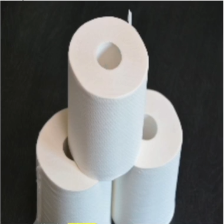

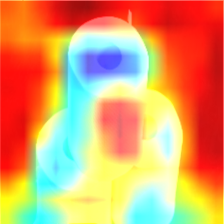

In [ ]:
import numpy as np
import cv2
import tensorflow as tf

from tensorflow.keras.applications import VGG16

class GradCam:
	def __init__(self, model):
		self.model = model
    # 畳み込み最終層の名前を確認するため
		print([layer.name for layer in self.model.layers]) 

	def gradcam_func(self, x, layer_name):
		#　一枚の画像だと、バッチの次元がないので足す
		X = x[np.newaxis, ...]
		# 正規化
		X = X / 255.

		# 畳み込み層の最後の層の出力を受け取る
		conv_feature = self.model.get_layer(layer_name).output
		model = tf.keras.Model([self.model.inputs], [conv_feature, self.model.output])

		# 勾配を記録するために tf.GradientTape() を使う
		with tf.GradientTape() as tape:
			# numpy配列を勾配を計算するためにtfの型に変換する
			X = tf.cast(X, tf.float32)
			conv_feature, outputs = model(X)

			# どのクラスを予測したか
			predicted_class = tf.math.argmax(outputs[0])
			# 予測したクラスの出力を取得する
			class_outputs = outputs[:, predicted_class]
		# 勾配を計算する
		grads = tape.gradient(class_outputs, conv_feature)
  
		print('予測クラス', predicted_class.numpy())
  
		# 平均を取る(GAP)
		weights = tf.math.reduce_mean(grads, axis=(1, 2))
		cam = conv_feature @ weights[..., tf.newaxis]
		cam = tf.squeeze(cam)

		# reluに通す
		cam = tf.nn.relu(cam)
		cam = cam / tf.math.reduce_max(cam)
		# 正規化を戻す
		cam = 255. * cam 

		# numpy配列にする
		cam = cam.numpy()
		cam = cam.astype('uint8')
		
		# カラーマップを作る
		jetcam = cv2.applyColorMap(cam, cv2.COLORMAP_JET) 
		# BGRからRGBに変換
		jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  
		jetcam = cv2.resize(jetcam, (224, 224))
		jetcam = jetcam + x / 2 

		return jetcam

model = VGG16(weights='imagenet')
gradcam = GradCam(model)
image = cv2.imread('../data/interpretability_example_input.png')
image = cv2.resize(image, (224, 224))
cam = gradcam.gradcam_func(image, 'block5_conv3')


if ENV_COLAB:
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    cv2_imshow(cam)
else: # Jupyter  
    from matplotlib import pyplot as plt
    cv2.imshow('',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite('../data/interpretability_example_output.png', cam)
    cam_read = cv2.imread('../data/interpretability_example_output.png')
    cv2.imshow('',cam_read)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [ ]:
{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma maculatum',
 29: 'axolotl, mud puppy, Ambystoma mexicanum',
 30: 'bullfrog, Rana catesbeiana',
 31: 'tree frog, tree-frog',
 32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 33: 'loggerhead, loggerhead turtle, Caretta caretta',
 34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
 35: 'mud turtle',
 36: 'terrapin',
 37: 'box turtle, box tortoise',
 38: 'banded gecko',
 39: 'common iguana, iguana, Iguana iguana',
 40: 'American chameleon, anole, Anolis carolinensis',
 41: 'whiptail, whiptail lizard',
 42: 'agama',
 43: 'frilled lizard, Chlamydosaurus kingi',
 44: 'alligator lizard',
 45: 'Gila monster, Heloderma suspectum',
 46: 'green lizard, Lacerta viridis',
 47: 'African chameleon, Chamaeleo chamaeleon',
 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
 49: 'African crocodile, Nile crocodile, Crocodylus niloticus',
 50: 'American alligator, Alligator mississipiensis',
 51: 'triceratops',
 52: 'thunder snake, worm snake, Carphophis amoenus',
 53: 'ringneck snake, ring-necked snake, ring snake',
 54: 'hognose snake, puff adder, sand viper',
 55: 'green snake, grass snake',
 56: 'king snake, kingsnake',
 57: 'garter snake, grass snake',
 58: 'water snake',
 59: 'vine snake',
 60: 'night snake, Hypsiglena torquata',
 61: 'boa constrictor, Constrictor constrictor',
 62: 'rock python, rock snake, Python sebae',
 63: 'Indian cobra, Naja naja',
 64: 'green mamba',
 65: 'sea snake',
 66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
 67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
 68: 'sidewinder, horned rattlesnake, Crotalus cerastes',
 69: 'trilobite',
 70: 'harvestman, daddy longlegs, Phalangium opilio',
 71: 'scorpion',
 72: 'black and gold garden spider, Argiope aurantia',
 73: 'barn spider, Araneus cavaticus',
 74: 'garden spider, Aranea diademata',
 75: 'black widow, Latrodectus mactans',
 76: 'tarantula',
 77: 'wolf spider, hunting spider',
 78: 'tick',
 79: 'centipede',
 80: 'black grouse',
 81: 'ptarmigan',
 82: 'ruffed grouse, partridge, Bonasa umbellus',
 83: 'prairie chicken, prairie grouse, prairie fowl',
 84: 'peacock',
 85: 'quail',
 86: 'partridge',
 87: 'African grey, African gray, Psittacus erithacus',
 88: 'macaw',
 89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
 90: 'lorikeet',
 91: 'coucal',
 92: 'bee eater',
 93: 'hornbill',
 94: 'hummingbird',
 95: 'jacamar',
 96: 'toucan',
 97: 'drake',
 98: 'red-breasted merganser, Mergus serrator',
 99: 'goose',
 100: 'black swan, Cygnus atratus',
 101: 'tusker',
 102: 'echidna, spiny anteater, anteater',
 103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
 104: 'wallaby, brush kangaroo',
 105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 106: 'wombat',
 107: 'jellyfish',
 108: 'sea anemone, anemone',
 109: 'brain coral',
 110: 'flatworm, platyhelminth',
 111: 'nematode, nematode worm, roundworm',
 112: 'conch',
 113: 'snail',
 114: 'slug',
 115: 'sea slug, nudibranch',
 116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 117: 'chambered nautilus, pearly nautilus, nautilus',
 118: 'Dungeness crab, Cancer magister',
 119: 'rock crab, Cancer irroratus',
 120: 'fiddler crab',
 121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica',
 122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 124: 'crayfish, crawfish, crawdad, crawdaddy',
 125: 'hermit crab',
 126: 'isopod',
 127: 'white stork, Ciconia ciconia',
 128: 'black stork, Ciconia nigra',
 129: 'spoonbill',
 130: 'flamingo',
 131: 'little blue heron, Egretta caerulea',
 132: 'American egret, great white heron, Egretta albus',
 133: 'bittern',
 134: 'crane',
 135: 'limpkin, Aramus pictus',
 136: 'European gallinule, Porphyrio porphyrio',
 137: 'American coot, marsh hen, mud hen, water hen, Fulica americana',
 138: 'bustard',
 139: 'ruddy turnstone, Arenaria interpres',
 140: 'red-backed sandpiper, dunlin, Erolia alpina',
 141: 'redshank, Tringa totanus',
 142: 'dowitcher',
 143: 'oystercatcher, oyster catcher',
 144: 'pelican',
 145: 'king penguin, Aptenodytes patagonica',
 146: 'albatross, mollymawk',
 147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
 148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
 149: 'dugong, Dugong dugon',
 150: 'sea lion',
 151: 'Chihuahua',
 152: 'Japanese spaniel',
 153: 'Maltese dog, Maltese terrier, Maltese',
 154: 'Pekinese, Pekingese, Peke',
 155: 'Shih-Tzu',
 156: 'Blenheim spaniel',
 157: 'papillon',
 158: 'toy terrier',
 159: 'Rhodesian ridgeback',
 160: 'Afghan hound, Afghan',
 161: 'basset, basset hound',
 162: 'beagle',
 163: 'bloodhound, sleuthhound',
 164: 'bluetick',
 165: 'black-and-tan coonhound',
 166: 'Walker hound, Walker foxhound',
 167: 'English foxhound',
 168: 'redbone',
 169: 'borzoi, Russian wolfhound',
 170: 'Irish wolfhound',
 171: 'Italian greyhound',
 172: 'whippet',
 173: 'Ibizan hound, Ibizan Podenco',
 174: 'Norwegian elkhound, elkhound',
 175: 'otterhound, otter hound',
 176: 'Saluki, gazelle hound',
 177: 'Scottish deerhound, deerhound',
 178: 'Weimaraner',
 179: 'Staffordshire bullterrier, Staffordshire bull terrier',
 180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 181: 'Bedlington terrier',
 182: 'Border terrier',
 183: 'Kerry blue terrier',
 184: 'Irish terrier',
 185: 'Norfolk terrier',
 186: 'Norwich terrier',
 187: 'Yorkshire terrier',
 188: 'wire-haired fox terrier',
 189: 'Lakeland terrier',
 190: 'Sealyham terrier, Sealyham',
 191: 'Airedale, Airedale terrier',
 192: 'cairn, cairn terrier',
 193: 'Australian terrier',
 194: 'Dandie Dinmont, Dandie Dinmont terrier',
 195: 'Boston bull, Boston terrier',
 196: 'miniature schnauzer',
 197: 'giant schnauzer',
 198: 'standard schnauzer',
 199: 'Scotch terrier, Scottish terrier, Scottie',
 200: 'Tibetan terrier, chrysanthemum dog',
 201: 'silky terrier, Sydney silky',
 202: 'soft-coated wheaten terrier',
 203: 'West Highland white terrier',
 204: 'Lhasa, Lhasa apso',
 205: 'flat-coated retriever',
 206: 'curly-coated retriever',
 207: 'golden retriever',
 208: 'Labrador retriever',
 209: 'Chesapeake Bay retriever',
 210: 'German short-haired pointer',
 211: 'vizsla, Hungarian pointer',
 212: 'English setter',
 213: 'Irish setter, red setter',
 214: 'Gordon setter',
 215: 'Brittany spaniel',
 216: 'clumber, clumber spaniel',
 217: 'English springer, English springer spaniel',
 218: 'Welsh springer spaniel',
 219: 'cocker spaniel, English cocker spaniel, cocker',
 220: 'Sussex spaniel',
 221: 'Irish water spaniel',
 222: 'kuvasz',
 223: 'schipperke',
 224: 'groenendael',
 225: 'malinois',
 226: 'briard',
 227: 'kelpie',
 228: 'komondor',
 229: 'Old English sheepdog, bobtail',
 230: 'Shetland sheepdog, Shetland sheep dog, Shetland',
 231: 'collie',
 232: 'Border collie',
 233: 'Bouvier des Flandres, Bouviers des Flandres',
 234: 'Rottweiler',
 235: 'German shepherd, German shepherd dog, German police dog, alsatian',
 236: 'Doberman, Doberman pinscher',
 237: 'miniature pinscher',
 238: 'Greater Swiss Mountain dog',
 239: 'Bernese mountain dog',
 240: 'Appenzeller',
 241: 'EntleBucher',
 242: 'boxer',
 243: 'bull mastiff',
 244: 'Tibetan mastiff',
 245: 'French bulldog',
 246: 'Great Dane',
 247: 'Saint Bernard, St Bernard',
 248: 'Eskimo dog, husky',
 249: 'malamute, malemute, Alaskan malamute',
 250: 'Siberian husky',
 251: 'dalmatian, coach dog, carriage dog',
 252: 'affenpinscher, monkey pinscher, monkey dog',
 253: 'basenji',
 254: 'pug, pug-dog',
 255: 'Leonberg',
 256: 'Newfoundland, Newfoundland dog',
 257: 'Great Pyrenees',
 258: 'Samoyed, Samoyede',
 259: 'Pomeranian',
 260: 'chow, chow chow',
 261: 'keeshond',
 262: 'Brabancon griffon',
 263: 'Pembroke, Pembroke Welsh corgi',
 264: 'Cardigan, Cardigan Welsh corgi',
 265: 'toy poodle',
 266: 'miniature poodle',
 267: 'standard poodle',
 268: 'Mexican hairless',
 269: 'timber wolf, grey wolf, gray wolf, Canis lupus',
 270: 'white wolf, Arctic wolf, Canis lupus tundrarum',
 271: 'red wolf, maned wolf, Canis rufus, Canis niger',
 272: 'coyote, prairie wolf, brush wolf, Canis latrans',
 273: 'dingo, warrigal, warragal, Canis dingo',
 274: 'dhole, Cuon alpinus',
 275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
 276: 'hyena, hyaena',
 277: 'red fox, Vulpes vulpes',
 278: 'kit fox, Vulpes macrotis',
 279: 'Arctic fox, white fox, Alopex lagopus',
 280: 'grey fox, gray fox, Urocyon cinereoargenteus',
 281: 'tabby, tabby cat',
 282: 'tiger cat',
 283: 'Persian cat',
 284: 'Siamese cat, Siamese',
 285: 'Egyptian cat',
 286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
 287: 'lynx, catamount',
 288: 'leopard, Panthera pardus',
 289: 'snow leopard, ounce, Panthera uncia',
 290: 'jaguar, panther, Panthera onca, Felis onca',
 291: 'lion, king of beasts, Panthera leo',
 292: 'tiger, Panthera tigris',
 293: 'cheetah, chetah, Acinonyx jubatus',
 294: 'brown bear, bruin, Ursus arctos',
 295: 'American black bear, black bear, Ursus americanus, Euarctos americanus',
 296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus',
 297: 'sloth bear, Melursus ursinus, Ursus ursinus',
 298: 'mongoose',
 299: 'meerkat, mierkat',
 300: 'tiger beetle',
 301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle',
 302: 'ground beetle, carabid beetle',
 303: 'long-horned beetle, longicorn, longicorn beetle',
 304: 'leaf beetle, chrysomelid',
 305: 'dung beetle',
 306: 'rhinoceros beetle',
 307: 'weevil',
 308: 'fly',
 309: 'bee',
 310: 'ant, emmet, pismire',
 311: 'grasshopper, hopper',
 312: 'cricket',
 313: 'walking stick, walkingstick, stick insect',
 314: 'cockroach, roach',
 315: 'mantis, mantid',
 316: 'cicada, cicala',
 317: 'leafhopper',
 318: 'lacewing, lacewing fly',
 319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
 320: 'damselfly',
 321: 'admiral',
 322: 'ringlet, ringlet butterfly',
 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
 324: 'cabbage butterfly',
 325: 'sulphur butterfly, sulfur butterfly',
 326: 'lycaenid, lycaenid butterfly',
 327: 'starfish, sea star',
 328: 'sea urchin',
 329: 'sea cucumber, holothurian',
 330: 'wood rabbit, cottontail, cottontail rabbit',
 331: 'hare',
 332: 'Angora, Angora rabbit',
 333: 'hamster',
 334: 'porcupine, hedgehog',
 335: 'fox squirrel, eastern fox squirrel, Sciurus niger',
 336: 'marmot',
 337: 'beaver',
 338: 'guinea pig, Cavia cobaya',
 339: 'sorrel',
 340: 'zebra',
 341: 'hog, pig, grunter, squealer, Sus scrofa',
 342: 'wild boar, boar, Sus scrofa',
 343: 'warthog',
 344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
 345: 'ox',
 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
 347: 'bison',
 348: 'ram, tup',
 349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
 350: 'ibex, Capra ibex',
 351: 'hartebeest',
 352: 'impala, Aepyceros melampus',
 353: 'gazelle',
 354: 'Arabian camel, dromedary, Camelus dromedarius',
 355: 'llama',
 356: 'weasel',
 357: 'mink',
 358: 'polecat, fitch, foulmart, foumart, Mustela putorius',
 359: 'black-footed ferret, ferret, Mustela nigripes',
 360: 'otter',
 361: 'skunk, polecat, wood pussy',
 362: 'badger',
 363: 'armadillo',
 364: 'three-toed sloth, ai, Bradypus tridactylus',
 365: 'orangutan, orang, orangutang, Pongo pygmaeus',
 366: 'gorilla, Gorilla gorilla',
 367: 'chimpanzee, chimp, Pan troglodytes',
 368: 'gibbon, Hylobates lar',
 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
 370: 'guenon, guenon monkey',
 371: 'patas, hussar monkey, Erythrocebus patas',
 372: 'baboon',
 373: 'macaque',
 374: 'langur',
 375: 'colobus, colobus monkey',
 376: 'proboscis monkey, Nasalis larvatus',
 377: 'marmoset',
 378: 'capuchin, ringtail, Cebus capucinus',
 379: 'howler monkey, howler',
 380: 'titi, titi monkey',
 381: 'spider monkey, Ateles geoffroyi',
 382: 'squirrel monkey, Saimiri sciureus',
 383: 'Madagascar cat, ring-tailed lemur, Lemur catta',
 384: 'indri, indris, Indri indri, Indri brevicaudatus',
 385: 'Indian elephant, Elephas maximus',
 386: 'African elephant, Loxodonta africana',
 387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
 388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
 389: 'barracouta, snoek',
 390: 'eel',
 391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',
 392: 'rock beauty, Holocanthus tricolor',
 393: 'anemone fish',
 394: 'sturgeon',
 395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',
 396: 'lionfish',
 397: 'puffer, pufferfish, blowfish, globefish',
 398: 'abacus',
 399: 'abaya',
 400: "academic gown, academic robe, judge's robe",
 401: 'accordion, piano accordion, squeeze box',
 402: 'acoustic guitar',
 403: 'aircraft carrier, carrier, flattop, attack aircraft carrier',
 404: 'airliner',
 405: 'airship, dirigible',
 406: 'altar',
 407: 'ambulance',
 408: 'amphibian, amphibious vehicle',
 409: 'analog clock',
 410: 'apiary, bee house',
 411: 'apron',
 412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
 413: 'assault rifle, assault gun',
 414: 'backpack, back pack, knapsack, packsack, rucksack, haversack',
 415: 'bakery, bakeshop, bakehouse',
 416: 'balance beam, beam',
 417: 'balloon',
 418: 'ballpoint, ballpoint pen, ballpen, Biro',
 419: 'Band Aid',
 420: 'banjo',
 421: 'bannister, banister, balustrade, balusters, handrail',
 422: 'barbell',
 423: 'barber chair',
 424: 'barbershop',
 425: 'barn',
 426: 'barometer',
 427: 'barrel, cask',
 428: 'barrow, garden cart, lawn cart, wheelbarrow',
 429: 'baseball',
 430: 'basketball',
 431: 'bassinet',
 432: 'bassoon',
 433: 'bathing cap, swimming cap',
 434: 'bath towel',
 435: 'bathtub, bathing tub, bath, tub',
 436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
 437: 'beacon, lighthouse, beacon light, pharos',
 438: 'beaker',
 439: 'bearskin, busby, shako',
 440: 'beer bottle',
 441: 'beer glass',
 442: 'bell cote, bell cot',
 443: 'bib',
 444: 'bicycle-built-for-two, tandem bicycle, tandem',
 445: 'bikini, two-piece',
 446: 'binder, ring-binder',
 447: 'binoculars, field glasses, opera glasses',
 448: 'birdhouse',
 449: 'boathouse',
 450: 'bobsled, bobsleigh, bob',
 451: 'bolo tie, bolo, bola tie, bola',
 452: 'bonnet, poke bonnet',
 453: 'bookcase',
 454: 'bookshop, bookstore, bookstall',
 455: 'bottlecap',
 456: 'bow',
 457: 'bow tie, bow-tie, bowtie',
 458: 'brass, memorial tablet, plaque',
 459: 'brassiere, bra, bandeau',
 460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty',
 461: 'breastplate, aegis, egis',
 462: 'broom',
 463: 'bucket, pail',
 464: 'buckle',
 465: 'bulletproof vest',
 466: 'bullet train, bullet',
 467: 'butcher shop, meat market',
 468: 'cab, hack, taxi, taxicab',
 469: 'caldron, cauldron',
 470: 'candle, taper, wax light',
 471: 'cannon',
 472: 'canoe',
 473: 'can opener, tin opener',
 474: 'cardigan',
 475: 'car mirror',
 476: 'carousel, carrousel, merry-go-round, roundabout, whirligig',
 477: "carpenter's kit, tool kit",
 478: 'carton',
 479: 'car wheel',
 480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
 481: 'cassette',
 482: 'cassette player',
 483: 'castle',
 484: 'catamaran',
 485: 'CD player',
 486: 'cello, violoncello',
 487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone',
 488: 'chain',
 489: 'chainlink fence',
 490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour',
 491: 'chain saw, chainsaw',
 492: 'chest',
 493: 'chiffonier, commode',
 494: 'chime, bell, gong',
 495: 'china cabinet, china closet',
 496: 'Christmas stocking',
 497: 'church, church building',
 498: 'cinema, movie theater, movie theatre, movie house, picture palace',
 499: 'cleaver, meat cleaver, chopper',
 500: 'cliff dwelling',
 501: 'cloak',
 502: 'clog, geta, patten, sabot',
 503: 'cocktail shaker',
 504: 'coffee mug',
 505: 'coffeepot',
 506: 'coil, spiral, volute, whorl, helix',
 507: 'combination lock',
 508: 'computer keyboard, keypad',
 509: 'confectionery, confectionary, candy store',
 510: 'container ship, containership, container vessel',
 511: 'convertible',
 512: 'corkscrew, bottle screw',
 513: 'cornet, horn, trumpet, trump',
 514: 'cowboy boot',
 515: 'cowboy hat, ten-gallon hat',
 516: 'cradle',
 517: 'crane',
 518: 'crash helmet',
 519: 'crate',
 520: 'crib, cot',
 521: 'Crock Pot',
 522: 'croquet ball',
 523: 'crutch',
 524: 'cuirass',
 525: 'dam, dike, dyke',
 526: 'desk',
 527: 'desktop computer',
 528: 'dial telephone, dial phone',
 529: 'diaper, nappy, napkin',
 530: 'digital clock',
 531: 'digital watch',
 532: 'dining table, board',
 533: 'dishrag, dishcloth',
 534: 'dishwasher, dish washer, dishwashing machine',
 535: 'disk brake, disc brake',
 536: 'dock, dockage, docking facility',
 537: 'dogsled, dog sled, dog sleigh',
 538: 'dome',
 539: 'doormat, welcome mat',
 540: 'drilling platform, offshore rig',
 541: 'drum, membranophone, tympan',
 542: 'drumstick',
 543: 'dumbbell',
 544: 'Dutch oven',
 545: 'electric fan, blower',
 546: 'electric guitar',
 547: 'electric locomotive',
 548: 'entertainment center',
 549: 'envelope',
 550: 'espresso maker',
 551: 'face powder',
 552: 'feather boa, boa',
 553: 'file, file cabinet, filing cabinet',
 554: 'fireboat',
 555: 'fire engine, fire truck',
 556: 'fire screen, fireguard',
 557: 'flagpole, flagstaff',
 558: 'flute, transverse flute',
 559: 'folding chair',
 560: 'football helmet',
 561: 'forklift',
 562: 'fountain',
 563: 'fountain pen',
 564: 'four-poster',
 565: 'freight car',
 566: 'French horn, horn',
 567: 'frying pan, frypan, skillet',
 568: 'fur coat',
 569: 'garbage truck, dustcart',
 570: 'gasmask, respirator, gas helmet',
 571: 'gas pump, gasoline pump, petrol pump, island dispenser',
 572: 'goblet',
 573: 'go-kart',
 574: 'golf ball',
 575: 'golfcart, golf cart',
 576: 'gondola',
 577: 'gong, tam-tam',
 578: 'gown',
 579: 'grand piano, grand',
 580: 'greenhouse, nursery, glasshouse',
 581: 'grille, radiator grille',
 582: 'grocery store, grocery, food market, market',
 583: 'guillotine',
 584: 'hair slide',
 585: 'hair spray',
 586: 'half track',
 587: 'hammer',
 588: 'hamper',
 589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier',
 590: 'hand-held computer, hand-held microcomputer',
 591: 'handkerchief, hankie, hanky, hankey',
 592: 'hard disc, hard disk, fixed disk',
 593: 'harmonica, mouth organ, harp, mouth harp',
 594: 'harp',
 595: 'harvester, reaper',
 596: 'hatchet',
 597: 'holster',
 598: 'home theater, home theatre',
 599: 'honeycomb',
 600: 'hook, claw',
 601: 'hoopskirt, crinoline',
 602: 'horizontal bar, high bar',
 603: 'horse cart, horse-cart',
 604: 'hourglass',
 605: 'iPod',
 606: 'iron, smoothing iron',
 607: "jack-o'-lantern",
 608: 'jean, blue jean, denim',
 609: 'jeep, landrover',
 610: 'jersey, T-shirt, tee shirt',
 611: 'jigsaw puzzle',
 612: 'jinrikisha, ricksha, rickshaw',
 613: 'joystick',
 614: 'kimono',
 615: 'knee pad',
 616: 'knot',
 617: 'lab coat, laboratory coat',
 618: 'ladle',
 619: 'lampshade, lamp shade',
 620: 'laptop, laptop computer',
 621: 'lawn mower, mower',
 622: 'lens cap, lens cover',
 623: 'letter opener, paper knife, paperknife',
 624: 'library',
 625: 'lifeboat',
 626: 'lighter, light, igniter, ignitor',
 627: 'limousine, limo',
 628: 'liner, ocean liner',
 629: 'lipstick, lip rouge',
 630: 'Loafer',
 631: 'lotion',
 632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system',
 633: "loupe, jeweler's loupe",
 634: 'lumbermill, sawmill',
 635: 'magnetic compass',
 636: 'mailbag, postbag',
 637: 'mailbox, letter box',
 638: 'maillot',
 639: 'maillot, tank suit',
 640: 'manhole cover',
 641: 'maraca',
 642: 'marimba, xylophone',
 643: 'mask',
 644: 'matchstick',
 645: 'maypole',
 646: 'maze, labyrinth',
 647: 'measuring cup',
 648: 'medicine chest, medicine cabinet',
 649: 'megalith, megalithic structure',
 650: 'microphone, mike',
 651: 'microwave, microwave oven',
 652: 'military uniform',
 653: 'milk can',
 654: 'minibus',
 655: 'miniskirt, mini',
 656: 'minivan',
 657: 'missile',
 658: 'mitten',
 659: 'mixing bowl',
 660: 'mobile home, manufactured home',
 661: 'Model T',
 662: 'modem',
 663: 'monastery',
 664: 'monitor',
 665: 'moped',
 666: 'mortar',
 667: 'mortarboard',
 668: 'mosque',
 669: 'mosquito net',
 670: 'motor scooter, scooter',
 671: 'mountain bike, all-terrain bike, off-roader',
 672: 'mountain tent',
 673: 'mouse, computer mouse',
 674: 'mousetrap',
 675: 'moving van',
 676: 'muzzle',
 677: 'nail',
 678: 'neck brace',
 679: 'necklace',
 680: 'nipple',
 681: 'notebook, notebook computer',
 682: 'obelisk',
 683: 'oboe, hautboy, hautbois',
 684: 'ocarina, sweet potato',
 685: 'odometer, hodometer, mileometer, milometer',
 686: 'oil filter',
 687: 'organ, pipe organ',
 688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO',
 689: 'overskirt',
 690: 'oxcart',
 691: 'oxygen mask',
 692: 'packet',
 693: 'paddle, boat paddle',
 694: 'paddlewheel, paddle wheel',
 695: 'padlock',
 696: 'paintbrush',
 697: "pajama, pyjama, pj's, jammies",
 698: 'palace',
 699: 'panpipe, pandean pipe, syrinx',
 700: 'paper towel',
 701: 'parachute, chute',
 702: 'parallel bars, bars',
 703: 'park bench',
 704: 'parking meter',
 705: 'passenger car, coach, carriage',
 706: 'patio, terrace',
 707: 'pay-phone, pay-station',
 708: 'pedestal, plinth, footstall',
 709: 'pencil box, pencil case',
 710: 'pencil sharpener',
 711: 'perfume, essence',
 712: 'Petri dish',
 713: 'photocopier',
 714: 'pick, plectrum, plectron',
 715: 'pickelhaube',
 716: 'picket fence, paling',
 717: 'pickup, pickup truck',
 718: 'pier',
 719: 'piggy bank, penny bank',
 720: 'pill bottle',
 721: 'pillow',
 722: 'ping-pong ball',
 723: 'pinwheel',
 724: 'pirate, pirate ship',
 725: 'pitcher, ewer',
 726: "plane, carpenter's plane, woodworking plane",
 727: 'planetarium',
 728: 'plastic bag',
 729: 'plate rack',
 730: 'plow, plough',
 731: "plunger, plumber's helper",
 732: 'Polaroid camera, Polaroid Land camera',
 733: 'pole',
 734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
 735: 'poncho',
 736: 'pool table, billiard table, snooker table',
 737: 'pop bottle, soda bottle',
 738: 'pot, flowerpot',
 739: "potter's wheel",
 740: 'power drill',
 741: 'prayer rug, prayer mat',
 742: 'printer',
 743: 'prison, prison house',
 744: 'projectile, missile',
 745: 'projector',
 746: 'puck, hockey puck',
 747: 'punching bag, punch bag, punching ball, punchball',
 748: 'purse',
 749: 'quill, quill pen',
 750: 'quilt, comforter, comfort, puff',
 751: 'racer, race car, racing car',
 752: 'racket, racquet',
 753: 'radiator',
 754: 'radio, wireless',
 755: 'radio telescope, radio reflector',
 756: 'rain barrel',
 757: 'recreational vehicle, RV, R.V.',
 758: 'reel',
 759: 'reflex camera',
 760: 'refrigerator, icebox',
 761: 'remote control, remote',
 762: 'restaurant, eating house, eating place, eatery',
 763: 'revolver, six-gun, six-shooter',
 764: 'rifle',
 765: 'rocking chair, rocker',
 766: 'rotisserie',
 767: 'rubber eraser, rubber, pencil eraser',
 768: 'rugby ball',
 769: 'rule, ruler',
 770: 'running shoe',
 771: 'safe',
 772: 'safety pin',
 773: 'saltshaker, salt shaker',
 774: 'sandal',
 775: 'sarong',
 776: 'sax, saxophone',
 777: 'scabbard',
 778: 'scale, weighing machine',
 779: 'school bus',
 780: 'schooner',
 781: 'scoreboard',
 782: 'screen, CRT screen',
 783: 'screw',
 784: 'screwdriver',
 785: 'seat belt, seatbelt',
 786: 'sewing machine',
 787: 'shield, buckler',
 788: 'shoe shop, shoe-shop, shoe store',
 789: 'shoji',
 790: 'shopping basket',
 791: 'shopping cart',
 792: 'shovel',
 793: 'shower cap',
 794: 'shower curtain',
 795: 'ski',
 796: 'ski mask',
 797: 'sleeping bag',
 798: 'slide rule, slipstick',
 799: 'sliding door',
 800: 'slot, one-armed bandit',
 801: 'snorkel',
 802: 'snowmobile',
 803: 'snowplow, snowplough',
 804: 'soap dispenser',
 805: 'soccer ball',
 806: 'sock',
 807: 'solar dish, solar collector, solar furnace',
 808: 'sombrero',
 809: 'soup bowl',
 810: 'space bar',
 811: 'space heater',
 812: 'space shuttle',
 813: 'spatula',
 814: 'speedboat',
 815: "spider web, spider's web",
 816: 'spindle',
 817: 'sports car, sport car',
 818: 'spotlight, spot',
 819: 'stage',
 820: 'steam locomotive',
 821: 'steel arch bridge',
 822: 'steel drum',
 823: 'stethoscope',
 824: 'stole',
 825: 'stone wall',
 826: 'stopwatch, stop watch',
 827: 'stove',
 828: 'strainer',
 829: 'streetcar, tram, tramcar, trolley, trolley car',
 830: 'stretcher',
 831: 'studio couch, day bed',
 832: 'stupa, tope',
 833: 'submarine, pigboat, sub, U-boat',
 834: 'suit, suit of clothes',
 835: 'sundial',
 836: 'sunglass',
 837: 'sunglasses, dark glasses, shades',
 838: 'sunscreen, sunblock, sun blocker',
 839: 'suspension bridge',
 840: 'swab, swob, mop',
 841: 'sweatshirt',
 842: 'swimming trunks, bathing trunks',
 843: 'swing',
 844: 'switch, electric switch, electrical switch',
 845: 'syringe',
 846: 'table lamp',
 847: 'tank, army tank, armored combat vehicle, armoured combat vehicle',
 848: 'tape player',
 849: 'teapot',
 850: 'teddy, teddy bear',
 851: 'television, television system',
 852: 'tennis ball',
 853: 'thatch, thatched roof',
 854: 'theater curtain, theatre curtain',
 855: 'thimble',
 856: 'thresher, thrasher, threshing machine',
 857: 'throne',
 858: 'tile roof',
 859: 'toaster',
 860: 'tobacco shop, tobacconist shop, tobacconist',
 861: 'toilet seat',
 862: 'torch',
 863: 'totem pole',
 864: 'tow truck, tow car, wrecker',
 865: 'toyshop',
 866: 'tractor',
 867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
 868: 'tray',
 869: 'trench coat',
 870: 'tricycle, trike, velocipede',
 871: 'trimaran',
 872: 'tripod',
 873: 'triumphal arch',
 874: 'trolleybus, trolley coach, trackless trolley',
 875: 'trombone',
 876: 'tub, vat',
 877: 'turnstile',
 878: 'typewriter keyboard',
 879: 'umbrella',
 880: 'unicycle, monocycle',
 881: 'upright, upright piano',
 882: 'vacuum, vacuum cleaner',
 883: 'vase',
 884: 'vault',
 885: 'velvet',
 886: 'vending machine',
 887: 'vestment',
 888: 'viaduct',
 889: 'violin, fiddle',
 890: 'volleyball',
 891: 'waffle iron',
 892: 'wall clock',
 893: 'wallet, billfold, notecase, pocketbook',
 894: 'wardrobe, closet, press',
 895: 'warplane, military plane',
 896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin',
 897: 'washer, automatic washer, washing machine',
 898: 'water bottle',
 899: 'water jug',
 900: 'water tower',
 901: 'whiskey jug',
 902: 'whistle',
 903: 'wig',
 904: 'window screen',
 905: 'window shade',
 906: 'Windsor tie',
 907: 'wine bottle',
 908: 'wing',
 909: 'wok',
 910: 'wooden spoon',
 911: 'wool, woolen, woollen',
 912: 'worm fence, snake fence, snake-rail fence, Virginia fence',
 913: 'wreck',
 914: 'yawl',
 915: 'yurt',
 916: 'web site, website, internet site, site',
 917: 'comic book',
 918: 'crossword puzzle, crossword',
 919: 'street sign',
 920: 'traffic light, traffic signal, stoplight',
 921: 'book jacket, dust cover, dust jacket, dust wrapper',
 922: 'menu',
 923: 'plate',
 924: 'guacamole',
 925: 'consomme',
 926: 'hot pot, hotpot',
 927: 'trifle',
 928: 'ice cream, icecream',
 929: 'ice lolly, lolly, lollipop, popsicle',
 930: 'French loaf',
 931: 'bagel, beigel',
 932: 'pretzel',
 933: 'cheeseburger',
 934: 'hotdog, hot dog, red hot',
 935: 'mashed potato',
 936: 'head cabbage',
 937: 'broccoli',
 938: 'cauliflower',
 939: 'zucchini, courgette',
 940: 'spaghetti squash',
 941: 'acorn squash',
 942: 'butternut squash',
 943: 'cucumber, cuke',
 944: 'artichoke, globe artichoke',
 945: 'bell pepper',
 946: 'cardoon',
 947: 'mushroom',
 948: 'Granny Smith',
 949: 'strawberry',
 950: 'orange',
 951: 'lemon',
 952: 'fig',
 953: 'pineapple, ananas',
 954: 'banana',
 955: 'jackfruit, jak, jack',
 956: 'custard apple',
 957: 'pomegranate',
 958: 'hay',
 959: 'carbonara',
 960: 'chocolate sauce, chocolate syrup',
 961: 'dough',
 962: 'meat loaf, meatloaf',
 963: 'pizza, pizza pie',
 964: 'potpie',
 965: 'burrito',
 966: 'red wine',
 967: 'espresso',
 968: 'cup',
 969: 'eggnog',
 970: 'alp',
 971: 'bubble',
 972: 'cliff, drop, drop-off',
 973: 'coral reef',
 974: 'geyser',
 975: 'lakeside, lakeshore',
 976: 'promontory, headland, head, foreland',
 977: 'sandbar, sand bar',
 978: 'seashore, coast, seacoast, sea-coast',
 979: 'valley, vale',
 980: 'volcano',
 981: 'ballplayer, baseball player',
 982: 'groom, bridegroom',
 983: 'scuba diver',
 984: 'rapeseed',
 985: 'daisy',
 986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
 987: 'corn',
 988: 'acorn',
 989: 'hip, rose hip, rosehip',
 990: 'buckeye, horse chestnut, conker',
 991: 'coral fungus',
 992: 'agaric',
 993: 'gyromitra',
 994: 'stinkhorn, carrion fungus',
 995: 'earthstar',
 996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa',
 997: 'bolete',
 998: 'ear, spike, capitulum',
 999: 'toilet tissue, toilet paper, bathroom tissue'}

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

## LIME

LIME (Local Interpretable Model-agnostic Explanations) 

特定の入力データに対する予測について、その判断根拠を解釈・可視化するツール  
-表形式データ：「どの変数が予測に効いたのか」  
-画像データ：「画像のどの部分が予測に効いたのか」 

・LIMEの働き方の詳細
単純で解釈しやすいモデルを用いて、複雑なモデルを近似することで解釈を行う※「複雑なモデル」=「人間による解釈の困難なアルゴリズムで作った予測モデル」例：決定木のアンサンブル学習器、ニューラルネットワークなど  
LIMEへの入力は１つの個別の予測結果（モデル全体の近似は複雑すぎる）  
対象サンプルの周辺のデータ空間からサンプリングして集めたデータセットを教師データとして、データ空間の対象範囲内でのみ有効な近似用モデルを作成  
近似用モデルから予測に寄与した特徴量を選び、解釈を行うことで、本来の難解なモデルの方を解釈したことと見なす  

LIMEの目標関数であり、LIMEが作成する説明を表した式
$$\xi(x)=argmin_{g\in{G}}L(f,g,\pi_x)+\Omega(g)$$

$G$が線形モデル、決定木などで、データを解釈するのに使われるモデル$g$は$G$の中の解釈可能なモデルのうちいずれかを表す$f$は解釈したい結果を予測するモデル（解釈したいモデル）$\pi_x$は$f$への入力データ$x$とどれだけあるデータが離れているかを表すあるデータと$x$との類似度とも言える  

$\Omega(g)$は、使っているモデル$g$がどれだけ複雑か、つまり解釈可能性のなさ、解釈のしづらさを表している
$L(f,g,\pi_x)$は$\pi_x$が定義する$x$との距離の指標を使って$g$が$f$を近似する際、どれだけ不正確かを表す  

つまり、解釈可能性と忠実性(gがfを近似する際の正確さ）の二つの質を保証するため、$L(f,g,\pi_x)$と$\Omega(g)$ の両方を小さくしなければいけない  

データのサンプリングgへの入力にはxを加工したものを入れる（摂動を入れる）  
画像であればスーパーピクセルという領域分割の技術を使いその一部をマスクしたり、テキストであれば単語をランダムに除去したり、表形式データであればランダムに一部のデータを作り直したりしている  

LIMEの働きを表した図を作成すると、関数fの分類結果はgが近似できない複雑な決定境界になっている  
しかし、説明したい例の周辺のデータのみをサンプリングして近似するだけでも、そのデータのみを説明するには十分  

・LIMEの損失関数  
$$L(f,g,\pi_x)= \sum_{z,z'\in{Z}}\pi_x(z){(f(z)-g(z'))}^2$$
$z$が説明したい例の近くのデータをサンプリングしたもの、$z'$が$z$に摂動を入れたもの
$\pi_x(z)= exp(-D(x,z)^2/\sigma^{2})$は$x$と$z$の距離関数（テキストであればコサイン類似度、画像であればユークリッド距離など）にマイナスをかけたものをカーネル幅で割ったもの  

カーネル幅(σ)はハイパーパラメーターで、それを決める明確な方法がない  

解釈したいモデルにzを入れた結果と解釈可能なモデルに$z'$を入れた結果の差に$z$と$x$との類似度で重み付けする

・LIMEを使った解釈  
前提：テキストを「無神論」と「キリスト教」に分類するタスクにおいて、Algorithm2は高い精度を達成した。LIMEを使ってある文章を「無神論」のクラスに分類した際の単語の重要度を表したものである。（Posting、Host、Re、byなど）  

しかし、Posting、Host、Reという単語はキリスト教にも無神論にも関係ない単語である。原因を探るためデータセットを調査したところ、このpostingという単語は学習データセットの22%の文に表れていて、さらにその99%は無神論のクラスに属していたことが分かった。  

解釈：このことから何が言えるか  

解釈：この分類器の判断基準は、無神論にもキリスト教にも関係ない単語になっていて、学習データの形式に依存しているデータセット自体に問題があるということが分かった  













## SHAP

SHAPは、学習済みモデルにおいて、各説明変数が予測値にどのような影響を与えたかを「貢献度」と定義して算出するモデルで、各データごとに結果を出力して可視化することができる。

協力ゲーム理論の概念であるshapley value（シャープレイ値）を機械学習に応用した  
shapley valueが想定する状況：プレイヤーが協力し、それによって獲得した報酬を分配する  

協力ゲーム理論：協力して得た報酬を、貢献度が異なるプレイヤーにどう分配するか  
機械学習：モデルから出力された予測値を、貢献度が異なる特徴量にどう分配するか  




### 実装演習 SHAP

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target
X = df[boston.feature_names]
y=df[['MEDV']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head(1))
print(len(X_test))
display(X_test.head(1))

tree_reg =DecisionTreeRegressor(max_depth=3,random_state=0).fit(X_train,y_train)

354


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.9,34.41


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


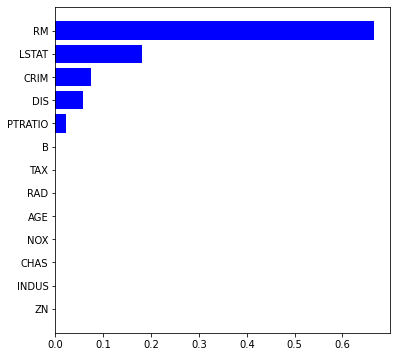

In [ ]:
import matplotlib.pyplot as plt
import numpy as  np

features = X_train.columns
importances = tree_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.show()

In [ ]:
X_test_pred = X_test.copy()
X_test_pred['pred'] = np.round(tree_reg.predict(X_test),2)
X_test_pred.describe()[['RM','LSTAT','CRIM','DIS','PTRATIO','pred']]

,RM,LSTAT,CRIM,DIS,PTRATIO,pred
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,6.229224,13.147763,4.207962,3.870929,18.413816,22.185592
std,0.703222,7.284263,9.154813,2.196886,2.025142,8.839852
min,3.863000,1.920000,0.013110,1.129600,12.600000,12.040000
25%,5.878000,7.777500,0.093500,2.032100,16.975000,16.870000
50%,6.157000,12.000000,0.229225,3.142300,18.700000,22.650000
75%,6.514500,17.280000,4.950015,5.491700,20.200000,22.650000
max,8.725000,37.970000,73.534100,10.710300,21.200000,50.000000


In [ ]:
X_test_pred.sort_values('RM')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,pred
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,22.65
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,12.04
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,12.04
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,16.87
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,22.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,46.25
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,46.25
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,28.55
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,46.25


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
import shap
explainer = shap.TreeExplainer(tree_reg)
explainer

In [ ]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       [ -1.59632303,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   8.7650647 ],
       [  0.47158564,   0.        ,   0.        , ...,   0.04999327,
          0.        ,   2.57406335],
       ...,
       [ -2.88802113,   0.        ,   0.        , ...,  -0.52492938,
          0.        , -12.51081884],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335],
       [  0.47158564,   0.        ,   0.        , ...,  -0.52492938,
          0.        ,   2.57406335]])

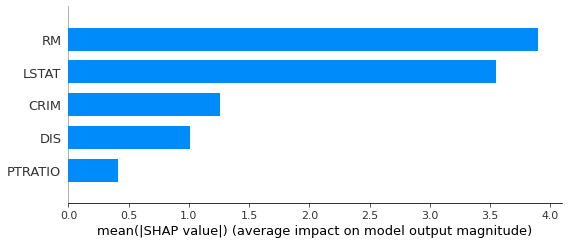

In [ ]:
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type='bar'
    , max_display=5
)

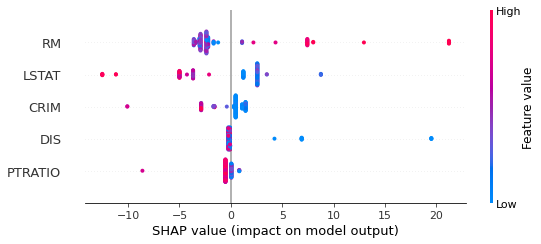

In [ ]:
shap.summary_plot(
    shap_values=shap_values
    , features=X_test
    , plot_type='dot'
    , max_display=5
)

RMは高ければ予測値も高くなる傾向があり、LSTATは逆に、高ければ予測値は低くなり低ければ予測値は高くなる傾向があることが直感的にわかる。

# Docker

Dockerとは、Docker社（旧dotCloud）が開発するコンテナのアプリケーション実行環境を管理するオープンソースソフトウェア（OSS）。2013年にオープンソースのプロジェクトとして公開。  

　コンテナは、実行環境を他のプロセスから隔離し、その中でアプリケーションを動作させる技術のこと。コンテナが利用するリソースは他のプロセスやコンテナから隔離されているため、コンテナに構築されたアプリは独立したコンピュータでアプリが動作しているように見える。

　コンテナを用いることで、異なるサーバでも、同じ構成の環境を簡単に構築することができる。PC全体を仮想化する仮想マシンとよく比べられるが、仮想マシンよりも軽量で高速に動作し、実行に必要なリソースも少なくて済む利点がある。

Dockerは、コンテナに含まれるアプリケーションをパッケージ化して実行する機能、コンテナを管理するためのツールとプラットフォームを備えている。

Dockerには次の3つのメリットがある。

1.開発ライフサイクルの改善に強い  

Dockerを使用すると、開発者はコンテナを利用して標準化された環境で作業できるようになる。その結果、開発ライフサイクルが改善され、CI/CD（継続的インテグレーション／継続的デリバリー）につながる。  

2.開発環境が簡単に用意でき、かつ本番環境と共通化できる

Dockerは「Docker Registry」「Docker Export／Import」という機能を有している。これは、コンテナの元となるDockerイメージ（後述）を異なるホスト間で共有する機能である。例えばチームで開発をする際、開発用マシンで作成したDockerイメージを他のメンバーのマシンに簡単にコピーできる。これにより、アプリケーションの移植性や相互運用性を高めることができる。

3.アプリケーション実行環境を高速にデプロイできる

コンテナは、Dockerを実行するホスト上で他のアプリケーションと同じプロセス単位で管理される。そのためコンテナでは、ハイパーバイザー型の仮想マシンでいうところのOSのブート処理が不要。より少ないリソースでより多くのことができるため、アプリケーションの実行環境を高速にデプロイすることが可能になる。

In [ ]:
from google.colab import files
import re

uploaded = files.upload()

for fn in uploaded.keys():
  fn_s = re.escape(fn)
  output_fn = fn.split('.', 1)[0]+'.html'
  output_fn_s = re.escape(output_fn)
  !jupyter nbconvert --to html $fn_s
  files.download(output_fn)
  !rm $fn_s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
